# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from tqdm import tqdm

# The Henon Heiles System

The henon heiles system is a system whose potential is given by the following formula:

$$V(x,y) = \frac 1 2 (x^2 + y^2) + \lambda (x^2 y - \frac{y^3}{3})$$

In most cases, the term lambda is set to unity.

It is a hamiltonian system, where the hamiltonian is given by 

$$H(x,y, \dot x, \dot y) = \frac 1 2 (\dot x ^2 + \dot y ^2) + V(x,y)$$

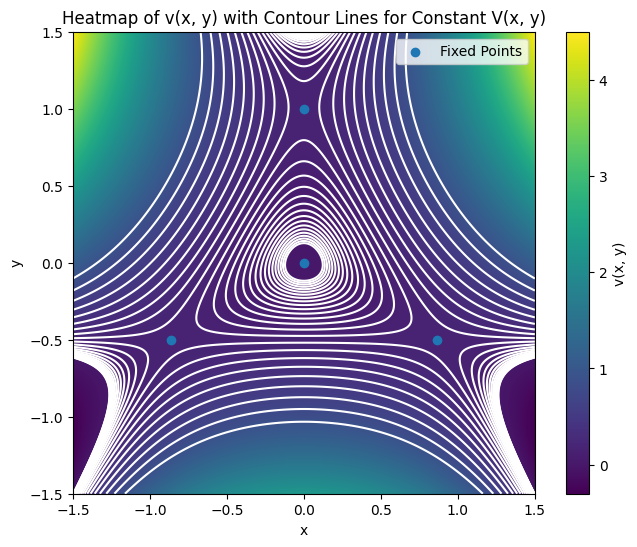

In [2]:
def v(x, y):
    lamb = 1
    V = 0.5 * (x**2 + y**2) + lamb * (y * x**2 - (y**3) / 3)
    return V

def E(x,y,vx, vy):
    E = v(x,y) + 0.5 * (vx**2 + vy**2)
    return E

# Define the range for x and y values
x_values = np.linspace(-1.5, 1.5, 1000)
y_values = np.linspace(-1.5, 1.5, 1000)

# Create a grid of x, y values
X, Y = np.meshgrid(x_values, y_values)

# Calculate the values of v(x, y) for each point in the grid
Z = v(X, Y)

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[np.min(x_values), np.max(x_values), np.min(y_values), np.max(y_values)],
           origin='lower', cmap='viridis')
plt.colorbar(label='v(x, y)')

# Add contour lines for constant values of V(x, y)
levels = 0.01*np.exp(np.linspace(np.min(Z), np.max(Z), 25))  # Adjust the number of levels as needed
plt.contour(X, Y, Z, levels=levels, colors='white')
x_vals = [0,0,(3/4)**0.5, -(3/4)**0.5]
y_vals = [0, 1, -0.5, -0.5]

plt.scatter(x_vals, y_vals, label = 'Fixed Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of v(x, y) with Contour Lines for Constant V(x, y)')
plt.show()


# Hamiltonian Equations of Motion

$$H = \frac 1 2 (p_x ^2 + p_y ^ 2) + V(x,y) $$

The particle moves in the $(x,y)$ plane. The Equations of motion can be obtained from the Hamilton's Equations of Motion.

$$\dot x = \frac {\partial H}{\partial p_x} = p_x$$
$$\dot y = \frac {\partial H}{\partial p_y} = p_y$$

$$\dot p_x = - \frac {\partial H}{\partial x} = - \frac {\partial V} {\partial x} = - 2xy - x$$

$$\dot p_y = - \frac {\partial H}{\partial y} = - \frac {\partial V} {\partial y} = y^2 - y - x^2$$

We must also consider the conservation of energy, which gives us the constraint on motion $$H(x,y, p_x, p_y) = E$$

This restricts the trajectory to lie in a three dimensional manifold in the four dimensional phase space.


# Analytically Solving the System:



## Constructing the Jacobian of the System

We do not assume that Lambda is 1 for this analysis

In [22]:
import sympy as sp
sp.init_printing()

# Define symbols
x, y, px, py, lamb = sp.symbols('x y px py \lambda')

# Define the equations
xdot = px
ydot = py
pxdot = -2*lamb*x*y - x
pydot = lamb*y**2 - y - lamb*x**2

# Define the vector of variables and equations
vars = [x, y, px, py]
eqs = [xdot, ydot, pxdot, pydot]

# Compute the Jacobian matrix
J = sp.Matrix([[sp.diff(eq, var) for var in vars] for eq in eqs])
print("Jacobian Matrix:")
J


Jacobian Matrix:


⎡       0                 0         1  0⎤
⎢                                       ⎥
⎢       0                 0         0  1⎥
⎢                                       ⎥
⎢-2⋅\lambda⋅y - 1   -2⋅\lambda⋅x    0  0⎥
⎢                                       ⎥
⎣  -2⋅\lambda⋅x    2⋅\lambda⋅y - 1  0  0⎦

We notice that the trace of the Jacobian is always zero for all fixed points

## Finding the Fixed Points for the System



In [23]:
import sympy as sp



# Define symbols
x, y, px, py, lamb = sp.symbols('x y px py \lambda')

# Define the equations
xdot = px
ydot = py
pxdot = -2*lamb*x*y - x
pydot = lamb*y**2 - y - lamb*x**2

# Define the vector of variables and equations
vars = [x, y, px, py]
eqs = [xdot, ydot, pxdot, pydot]

# Solve the system of equations
solution = sp.solve(eqs, vars)

print("Solution:")
solution


Solution:


## Finding the Determinant for the fixed points

In [24]:
print("Determinant of the Jacobian matrix")
J.det()

Determinant of the Jacobian matrix


In [28]:
# Iterate through the solutions
for soln in solution:
    x_0, y_0, px_0, py_0 = soln
    # Substitute the solution into the Jacobian determinant
    J_at_point = J.subs({x: x_0, y: y_0, px: px_0, py: py_0})
    # Display the determinant
    print("For Solution")
    display(soln)
    print("The determinant is found to be:")
    display(J_at_point.det())
    print("================================================")

For Solution


The determinant is found to be:


For Solution


The determinant is found to be:


For Solution


The determinant is found to be:


For Solution


The determinant is found to be:


## Numerical Analysis of the System

Here we discretize the system with the RK4 Method, and use Numba to speed up the code execution

## Defining the Diffrential Equations in Python Code

Just In Time Compilation with Numba is used to speed up the code execution

In [11]:
@jit(nopython = True)
def energy(x, y, vx, vy):
    energy = 0.5*(x**2 + y**2 + vx**2 + vy**2 + 2*x*x*y - 2*y*y*y/3)
    return energy

# Define the differential equations
@jit(nopython = True)
def dxdt(x, y, vx, vy, E=(1/8)):
    return vx

@jit(nopython = True)
def dydt(x, y, vx, vy, E=(1/8)):
    return vy

@jit(nopython = True)
def dvxdt(x, y, vx, vy, E=(1/8)):
    return -x - 2*x*y

@jit(nopython = True)
def dvydt(x, y, vx, vy, E=(1/8)):
    return -y - x**2 + y**2

# Define the function to perform a single RK4 step
@jit(nopython = True)
def rk4_step(x, y, vx, vy, dt):
    k1_x = dxdt(x, y, vx, vy) * dt
    k1_y = dydt(x, y, vx, vy) * dt
    k1_vx = dvxdt(x, y, vx, vy) * dt
    k1_vy = dvydt(x, y, vx, vy) * dt

    k2_x = dxdt(x + 0.5 * k1_x, y + 0.5 * k1_y, vx + 0.5 * k1_vx, vy + 0.5 * k1_vy) * dt
    k2_y = dydt(x + 0.5 * k1_x, y + 0.5 * k1_y, vx + 0.5 * k1_vx, vy + 0.5 * k1_vy) * dt
    k2_vx = dvxdt(x + 0.5 * k1_x, y + 0.5 * k1_y, vx + 0.5 * k1_vx, vy + 0.5 * k1_vy) * dt
    k2_vy = dvydt(x + 0.5 * k1_x, y + 0.5 * k1_y, vx + 0.5 * k1_vx, vy + 0.5 * k1_vy) * dt

    k3_x = dxdt(x + 0.5 * k2_x, y + 0.5 * k2_y, vx + 0.5 * k2_vx, vy + 0.5 * k2_vy) * dt
    k3_y = dydt(x + 0.5 * k2_x, y + 0.5 * k2_y, vx + 0.5 * k2_vx, vy + 0.5 * k2_vy) * dt
    k3_vx = dvxdt(x + 0.5 * k2_x, y + 0.5 * k2_y, vx + 0.5 * k2_vx, vy + 0.5 * k2_vy) * dt
    k3_vy = dvydt(x + 0.5 * k2_x, y + 0.5 * k2_y, vx + 0.5 * k2_vx, vy + 0.5 * k2_vy) * dt

    k4_x = dxdt(x + k3_x, y + k3_y, vx + k3_vx, vy + k3_vy) * dt
    k4_y = dydt(x + k3_x, y + k3_y, vx + k3_vx, vy + k3_vy) * dt
    k4_vx = dvxdt(x + k3_x, y + k3_y, vx + k3_vx, vy + k3_vy) * dt
    k4_vy = dvydt(x + k3_x, y + k3_y, vx + k3_vx, vy + k3_vy) * dt

    x_new = x + (1/6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    y_new = y + (1/6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    vx_new = vx + (1/6) * (k1_vx + 2 * k2_vx + 2 * k3_vx + k4_vx)
    vy_new = vy + (1/6) * (k1_vy + 2 * k2_vy + 2 * k3_vy + k4_vy)

    return x_new, y_new, vx_new, vy_new

## Plotting with initial Conditions to check our Code

### Running Simulation

In [4]:
# Initial conditions
x_0, y_0, vx_0, vy_0 = 0.25, 0.15, 0, 0


print("Initial Values are:", x_0, y_0, vx_0, vy_0)
print("Energy is equal to:", energy(x_0, y_0, vx_0, vy_0))

print("============================================================")
print("Initializing Arrays...")
print("============================================================")

# Time parameters
t_0 = 0
t_end = 100000  # Choose an appropriate end time
dt = 0.01  # Time step size

# Number of steps
num_steps = int((t_end - t_0) / dt)
t_values = np.linspace(t_0, t_end, num_steps)


# Create a 2D array to store results (each column represents x, y, vx, vy)
results = np.zeros((num_steps, 4))

# Set initial values
results[0] = [x_0, y_0, vx_0, vy_0]

print("============================================================")
print("Arrays Initialized.")
print("Beginning simulation....")
print("============================================================")

# Run the simulation using RK4 method
for i in tqdm(range(1, num_steps)):
    x, y, vx, vy = results[i-1]
    x_new, y_new, vx_new, vy_new = rk4_step(x, y, vx, vy, dt)
    results[i] = [x_new, y_new, vx_new, vy_new]




Initial Values are: 0.25 0.15 0 0
Energy is equal to: 0.050749999999999997
Initializing Arrays...
Arrays Initialized.
Beginning simulation....


100%|██████████| 9999999/9999999 [00:32<00:00, 307046.52it/s]


Plotting With energy =  0.050749999999999997


100%|██████████| 9999999/9999999 [00:06<00:00, 1634517.60it/s]


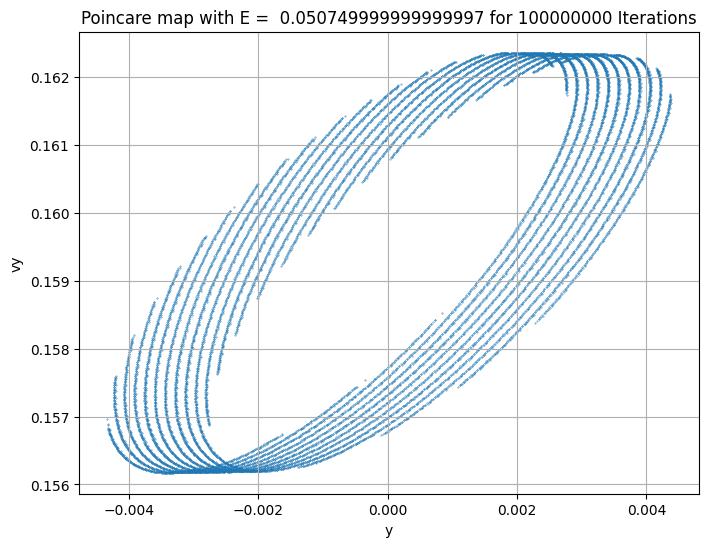

In [6]:
intersections = []

# Iterate through each point in the trajectory, starting from the second point
x_0 = results[0][0]
y_0 = results[0][1]
vx_0 = results[0][2]
vy_0 = results[0][3]
print("Plotting With energy = ", energy(x_0, y_0, vx_0, vy_0) )
for i in tqdm(range(1, len(results))):
    # Check if the trajectory crosses x = 0 between the current point (i) and the previous point (i-1)
    if results[i-1, 0] < 0 and results[i, 0] > 0:
        # Interpolate the y and vy values
        y_interpolated = (results[i-1, 1] + results[i, 1]) / 2
        vy_interpolated = (results[i-1, 3] + results[i, 3]) / 2
        # Append the interpolated values to the intersections list
        intersections.append((y_interpolated, vy_interpolated))

# intersections now contains the interpolated coordinates in the y-vy plane where the trajectory crosses x = 0

# Extract y and vy values from the intersections list
y_values_selected = [point[0] for point in intersections]
vy_values_selected = [point[1] for point in intersections]

# Plot the scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(y_values_selected, vy_values_selected, s = 0.1)


plt.xlabel('y')
plt.ylabel('vy')
plt.title('Poincare map with E =  ' + str(energy(x_0 , y_0, vx_0, vy_0)) + " for 100000000 Iterations")
plt.grid(True)
plt.show()



### Defining the Poincare Map as a Function

And checking again if the function works

Simulating With energy =  0.050749999999999997


100%|██████████| 9999999/9999999 [00:08<00:00, 1136821.96it/s]


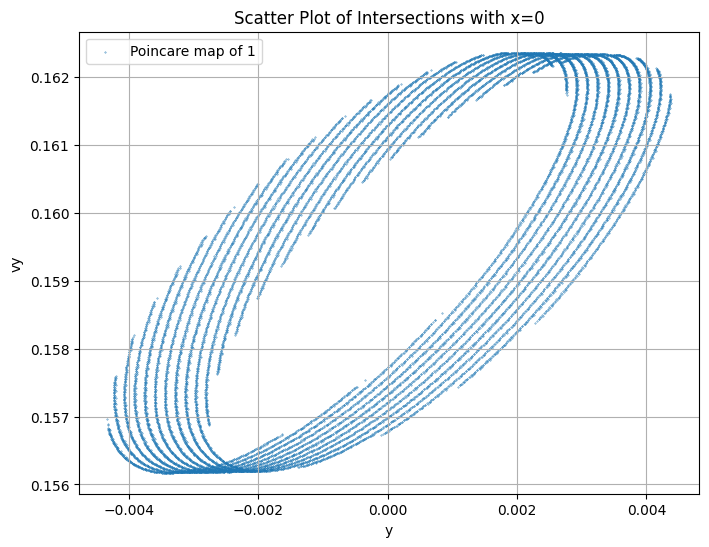

In [7]:
def plot_poincare_map(array_of_results):
    # Initialize a list to store the interpolated coordinates in the y-vy plane where the trajectory crosses x = 0

    index = 1
    for results in array_of_results:
        intersections = []

        # Iterate through each point in the trajectory, starting from the second point
        x_0 = results[0][0]
        y_0 = results[0][1]
        vx_0 = results[0][2]
        vy_0 = results[0][3]
        print("Simulating With energy = ", energy(x_0 , y_0, vx_0, vy_0) )
        for i in tqdm(range(1, len(results))):
            # Check if the trajectory crosses x = 0 between the current point (i) and the previous point (i-1)
            if results[i-1, 0] < 0 and results[i, 0] > 0:
                # Interpolate the y and vy values
                y_interpolated = (results[i-1, 1] + results[i, 1]) / 2
                vy_interpolated = (results[i-1, 3] + results[i, 3]) / 2
                # Append the interpolated values to the intersections list
                intersections.append((y_interpolated, vy_interpolated))

        # intersections now contains the interpolated coordinates in the y-vy plane where the trajectory crosses x = 0

        # Extract y and vy values from the intersections list
        y_values_selected = [point[0] for point in intersections]
        vy_values_selected = [point[1] for point in intersections]

        # Plot the scatter plot

        plt.figure(figsize=(8, 6))
        plt.scatter(y_values_selected, vy_values_selected, label='Poincare map of ' + str(index), s = 0.1)
        index += 1

        plt.xlabel('y')
        plt.ylabel('vy')
        plt.title('Scatter Plot of Intersections with x=0')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_poincare_map([results,])

## Checking For Energy Conservation in the System

We do this in two methods: 
1. Simulate the system for various initial energies, and check if energy is constant over time.
2. Simulate the system for a given initial energy, and check if th trajectory crosses the constant energy manifold it begins at.

The Following Code checks for the second method

Initial Values are: 0.25 0.25 0 0
Energy is equal to: 0.07291666666666667
Initializing Arrays...
Arrays Initialized.
Beginning simulation....


100%|██████████| 9999/9999 [00:00<00:00, 144954.10it/s]

Simulation Complete.
Plotting results...


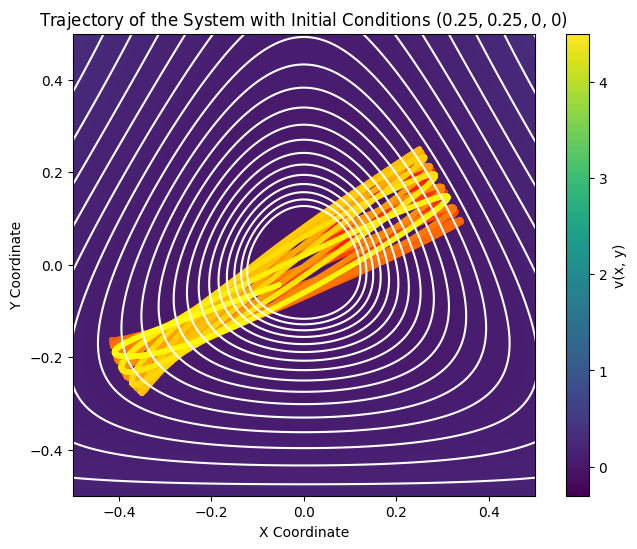

In [8]:
# Initial conditions
x_0, y_0, vx_0, vy_0 = 0.25, 0.25, 0, 0

print("Initial Values are:", x_0, y_0, vx_0, vy_0)
print("Energy is equal to:", energy(x_0, y_0, vx_0, vy_0))

print("============================================================")
print("Initializing Arrays...")
print("============================================================")

# Time parameters
t_0 = 0
t_end = 100  # Choose an appropriate end time
dt = 0.01  # Time step size

# Number of steps
num_steps = int((t_end - t_0) / dt)
t_values = np.linspace(t_0, t_end, num_steps)


# Create a 2D array to store results (each column represents x, y, vx, vy)
results = np.zeros((num_steps, 4))

# Set initial values
results[0] = [x_0, y_0, vx_0, vy_0]

print("============================================================")
print("Arrays Initialized.")
print("Beginning simulation....")
print("============================================================")

# Run the simulation using RK4 method
for i in tqdm(range(1, num_steps)):
    x, y, vx, vy = results[i-1]
    x_new, y_new, vx_new, vy_new = rk4_step(x, y, vx, vy, dt)
    results[i] = [x_new, y_new, vx_new, vy_new]

print("================================================================")
print("Simulation Complete.")
print("Plotting results...")
print("================================================================")

# Create figure and 3D axis

def v(x, y):
    lamb = 1
    V = 0.5 * (x**2 + y**2) + lamb * (y * x**2 - (y**3) / 3)
    return V

def E(x,y,vx, vy):
    E = v(x,y) + 0.5 * (vx**2 + vy**2)
    return E

# Define the range for x and y values
x_values = np.linspace(-1.5, 1.5, 1000)
y_values = np.linspace(-1.5, 1.5, 1000)

# Create a grid of x, y values
X, Y = np.meshgrid(x_values, y_values)

# Calculate the values of v(x, y) for each point in the grid
Z = v(X, Y)

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[np.min(x_values), np.max(x_values), np.min(y_values), np.max(y_values)],
           origin='lower', cmap='viridis')
plt.colorbar(label='v(x, y)')

# Add contour lines for constant values of V(x, y)
levels = 0.01*np.exp(np.linspace(np.min(Z), np.max(Z), 25))  # Adjust the number of levels as needed
plt.contour(X, Y, Z, levels=levels, colors='white')
plt.xlim(-0.5,0.5)
plt.ylim(-0.5, 0.5)


plt.scatter(results[:,0], results[:,1], c = t_values, cmap = "autumn", marker = '.')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Trajectory of the System with Initial Conditions $(0.25, 0.25, 0, 0)$")
plt.show()



The Following code checks for the first method. We first plot the X and Y coordinates vs the Time, and then plot the energy.

100%|██████████| 9999/9999 [00:00<00:00, 308605.32it/s]


100%|██████████| 9999/9999 [00:00<00:00, 480366.13it/s]


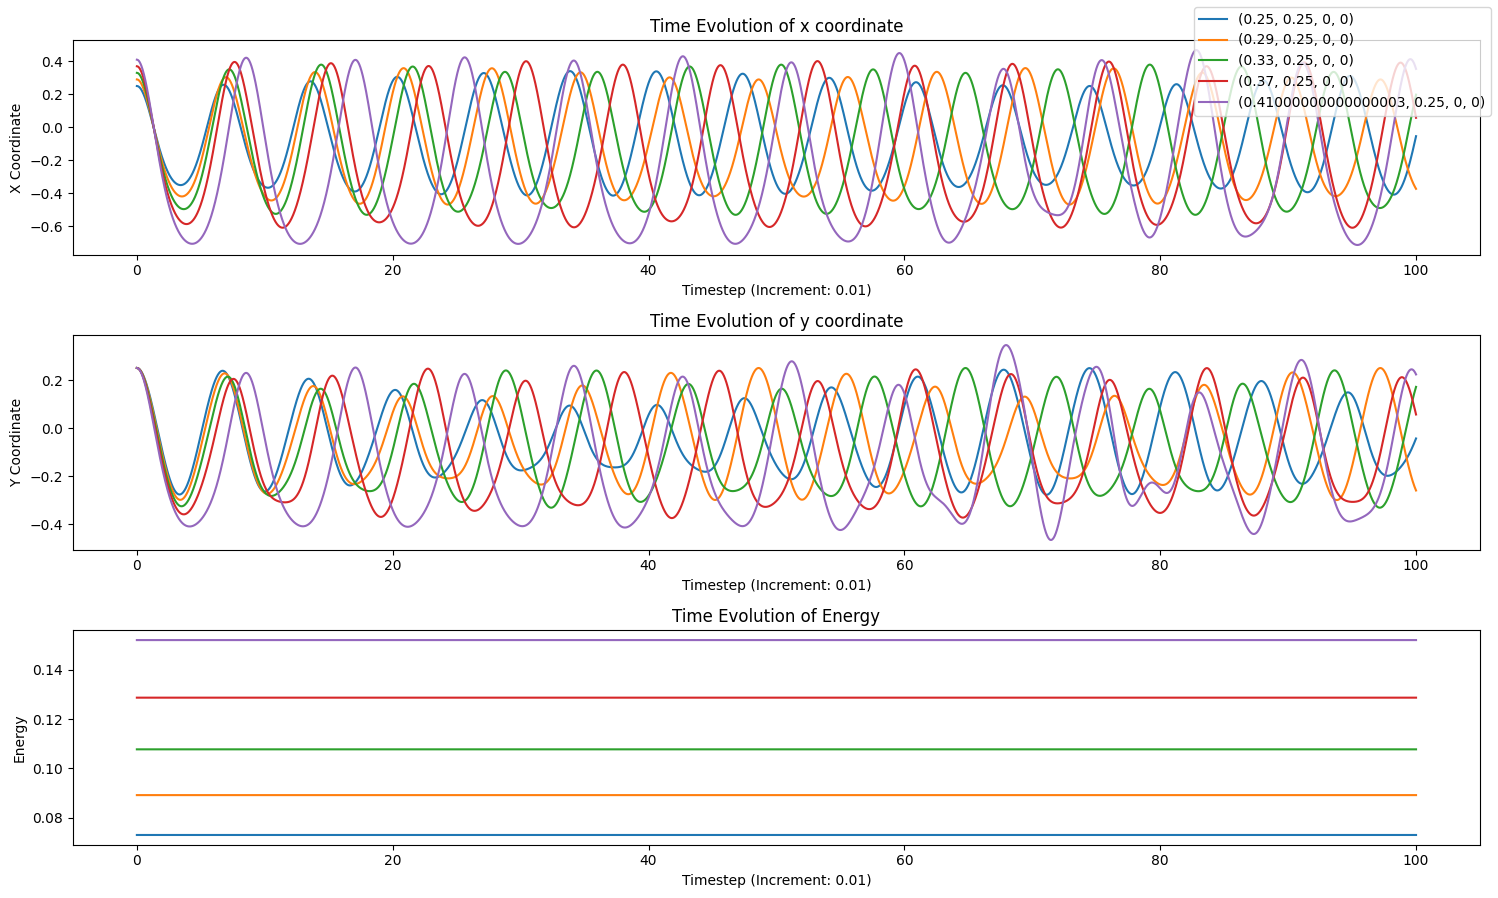

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def v(x, y):
    lamb = 1
    V = 0.5 * (x**2 + y**2) + lamb * (y * x**2 - (y**3) / 3)
    return V

def energy(x, y, vx, vy):
    E = v(x,y) + 0.5 * (vx ** 2 + vy ** 2)
    return E

# Create figure and subplots

# Create figure and subplots

# Create figure and subplots
fig, axs = plt.subplots(3, figsize=(15, 9))  # Increase height to accommodate energy plot

for iteration_number in range(5):
    # Initial conditions
    x_0, y_0, vx_0, vy_0 = 0.25, 0.25, 0, 0
    x_0 = x_0 + 0.04 * iteration_number

    # Time parameters
    t_0 = 0
    t_end = 100  # Choose an appropriate end time
    dt = 0.01  # Time step size

    # Number of steps
    num_steps = int((t_end - t_0) / dt)
    t_values = np.linspace(t_0, t_end, num_steps)

    # Create a 2D array to store results (each column represents x, y, vx, vy)
    results = np.zeros((num_steps, 4))

    # Set initial values
    results[0] = [x_0, y_0, vx_0, vy_0]

    # Run the simulation using RK4 method
    for i in tqdm(range(1, num_steps)):
        x, y, vx, vy = results[i-1]
        x_new, y_new, vx_new, vy_new = rk4_step(x, y, vx, vy, dt)
        results[i] = [x_new, y_new, vx_new, vy_new]

    # Plot x coordinate
    axs[0].plot(t_values, results[:, 0], label=str((x_0, y_0, vx_0, vy_0)))
    axs[0].set_xlabel("Timestep (Increment: 0.01)")
    axs[0].set_ylabel("X Coordinate")
    axs[0].set_title("Time Evolution of x coordinate")

    # Plot y coordinate
    axs[1].plot(t_values, results[:, 1], label=str((x_0, y_0, vx_0, vy_0)))
    axs[1].set_xlabel("Timestep (Increment: 0.01)")
    axs[1].set_ylabel("Y Coordinate")
    axs[1].set_title("Time Evolution of y coordinate")

    # Calculate energy at each point and plot
    energy_values = [energy(*point) for point in results]
    axs[2].plot(t_values, energy_values, label=str((x_0, y_0, vx_0, vy_0)))
    axs[2].set_xlabel("Timestep (Increment: 0.01)")
    axs[2].set_ylabel("Energy")
    axs[2].set_title("Time Evolution of Energy")

# Set a single legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


## Phase Space Plot of the System

Here we plot the system and introduce a small perturbation to the x coordinate.

The results of the plot should give us insight into how the KAM theorem holds in the context of the Henon Heiles System. 

Initial Values are: 0.25 0.15 0 0
Energy is equal to: 0.050749999999999997
Perturbed Energy is equal to: 0.061085000000000014
Initializing Arrays...
Arrays Initialized.
Beginning simulation....


  0%|          | 0/9999999 [00:00<?, ?it/s]

100%|██████████| 9999999/9999999 [00:40<00:00, 246205.77it/s]


Simulation Complete.
Plotting results...


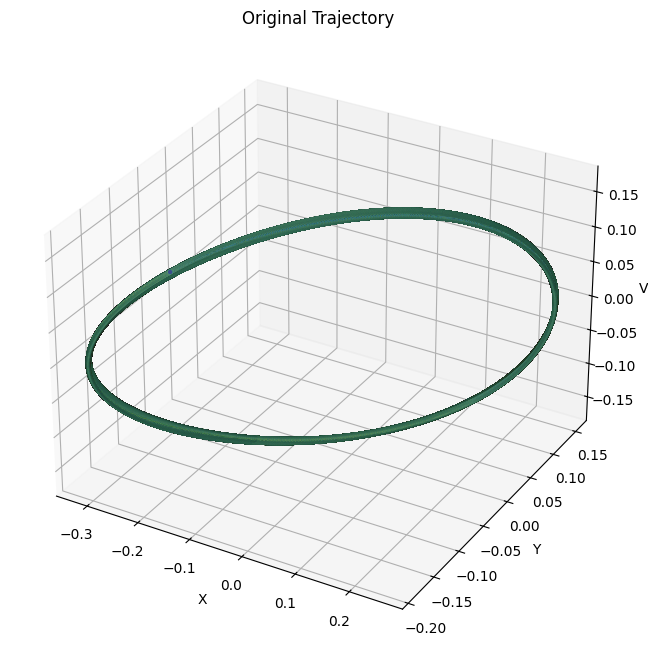

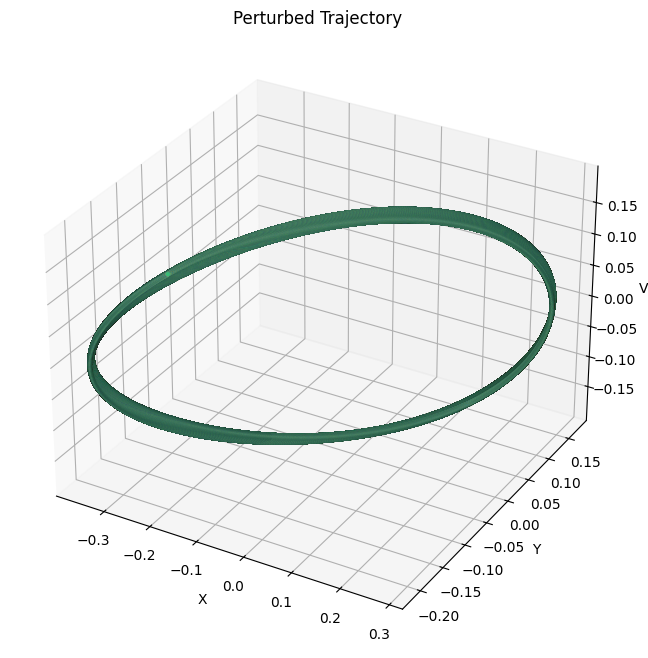

Simulating With energy =  0.050749999999999997


100%|██████████| 9999999/9999999 [00:05<00:00, 1858513.71it/s]


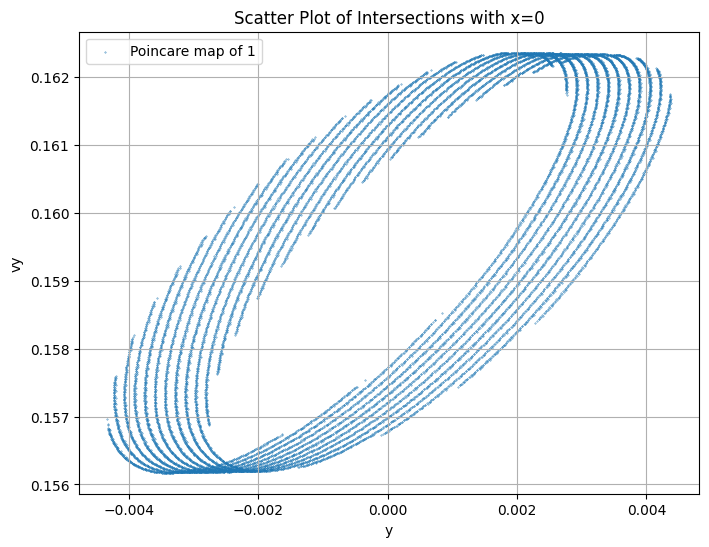

Simulating With energy =  0.061085000000000014


100%|██████████| 9999999/9999999 [00:04<00:00, 2233831.57it/s]


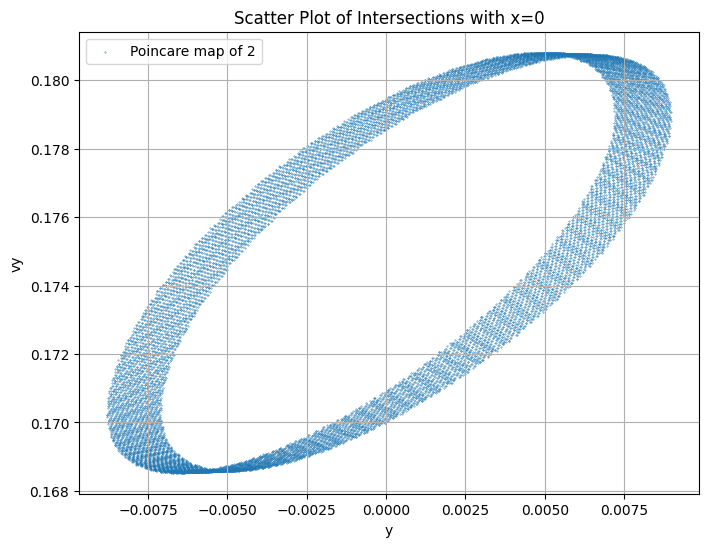

In [30]:
# Checking the Energy of the Initial Conditions

# Initial conditions
x_0, y_0, vx_0, vy_0 = 0.25, 0.15, 0, 0
perturbation = 0.03

print("Initial Values are:", x_0, y_0, vx_0, vy_0)
print("Energy is equal to:", energy(x_0, y_0, vx_0, vy_0))
print("Perturbed Energy is equal to:", energy(x_0 + perturbation, y_0, vx_0, vy_0))


print("============================================================")
print("Initializing Arrays...")
print("============================================================")

# Time parameters
t_0 = 0
t_end = 100000  # Choose an appropriate end time
dt = 0.01  # Time step size

# Number of steps
num_steps = int((t_end - t_0) / dt)
t_values = np.linspace(t_0, t_end, num_steps)


# Create a 2D array to store results (each column represents x, y, vx, vy)
results = np.zeros((num_steps, 4))
results_perturbed = np.zeros((num_steps, 4))

# Set initial values
results[0] = [x_0, y_0, vx_0, vy_0]
results_perturbed[0] = [x_0 + perturbation, y_0, vx_0, vy_0]

print("============================================================")
print("Arrays Initialized.")
print("Beginning simulation....")
print("============================================================")

# Run the simulation using RK4 method
for i in tqdm(range(1, num_steps)):
    x, y, vx, vy = results[i-1]
    x_new, y_new, vx_new, vy_new = rk4_step(x, y, vx, vy, dt)
    results[i] = [x_new, y_new, vx_new, vy_new]

    # Perturbed trajectory
    x_p, y_p, vx_p, vy_p = results_perturbed[i-1]
    x_new_p, y_new_p, vx_new_p, vy_new_p = rk4_step(x_p, y_p, vx_p, vy_p, dt)
    results_perturbed[i] = [x_new_p, y_new_p, vx_new_p, vy_new_p]

print("================================================================")
print("Simulation Complete.")
print("Plotting results...")
print("================================================================")

# Plot original trajectory
# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory
ax.scatter(results[:, 0], results[:, 1], results[:, 3], c=t_values, cmap='viridis', marker='.')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('VY')
ax.set_title('Original Trajectory')

# Show plot
plt.show()

# Plot perturbed trajectory
# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory
ax.scatter(results_perturbed[:, 0], results_perturbed[:, 1], results_perturbed[:, 3], c=t_values, cmap='viridis', marker='.')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('VY')
ax.set_title('Perturbed Trajectory')

# Show plot
plt.show()


plot_poincare_map((results, results_perturbed))


We observe that the phase phase of the system is limited to an n-torus, when we make a 3d plot of the trajectory in the x, y and vy plane, which is what we expect from the system. After giving the system a small perturbation, it still is confined to a slightly different, n-torus, which matches the prediction laid out by the KAM Theorem.

## Evolution of the Poincare Map with varying energies of the system



In [31]:
# Checking the Energy of the Initial Conditions

# Initial conditions
x_0, y_0, vx_0, vy_0 = 0.25, 0.15, 0, 0
perturbation = 0.001

number_of_plots = 20 #This was set to 240 to generate that gif

print("Initial Values are:", x_0, y_0, vx_0, vy_0)
print("Energy is equal to:", energy(x_0, y_0, vx_0, vy_0))
print("Perturbed Energy is equal to:", energy(x_0 + perturbation*number_of_plots, y_0, vx_0, vy_0))

Initial Values are: 0.25 0.15 0 0
Energy is equal to: 0.050749999999999997
Perturbed Energy is equal to: 0.057510000000000006


In [33]:
def plot_and_save_poincare_map(array_of_results, filename = 'poincare_map.png'):
    # Initialize a list to store the interpolated coordinates in the y-vy plane where the trajectory crosses x = 0

    index = 1
    for results in array_of_results:
        intersections = []

        # Iterate through each point in the trajectory, starting from the second point
        x_0 = results[0][0]
        y_0 = results[0][1]
        vx_0 = results[0][2]
        vy_0 = results[0][3]
        print("Plotting With energy = ", energy(x_0, y_0, vx_0, vy_0) )
        for i in tqdm(range(1, len(results))):
            # Check if the trajectory crosses x = 0 between the current point (i) and the previous point (i-1)
            if results[i-1, 0] < 0 and results[i, 0] > 0:
                # Interpolate the y and vy values
                y_interpolated = (results[i-1, 1] + results[i, 1]) / 2
                vy_interpolated = (results[i-1, 3] + results[i, 3]) / 2
                # Append the interpolated values to the intersections list
                intersections.append((y_interpolated, vy_interpolated))

        # intersections now contains the interpolated coordinates in the y-vy plane where the trajectory crosses x = 0

        # Extract y and vy values from the intersections list
        y_values_selected = [point[0] for point in intersections]
        vy_values_selected = [point[1] for point in intersections]

        # Plot the scatter plot

        plt.figure(figsize=(8, 6))
        plt.scatter(y_values_selected, vy_values_selected, s = 0.1)
        index += 1

        plt.xlabel('y')
        plt.ylabel('vy')
        plt.title('Poincare map with E =  ' + str(energy(x_0 , y_0, vx_0, vy_0)))
        plt.grid(True)
        plt.savefig(filename)
        plt.show()
        


Beginning simulation....
Simulating With energy =  0.050749999999999997


100%|██████████| 9999999/9999999 [00:25<00:00, 390030.38it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.050749999999999997


100%|██████████| 9999999/9999999 [00:03<00:00, 2812468.01it/s]


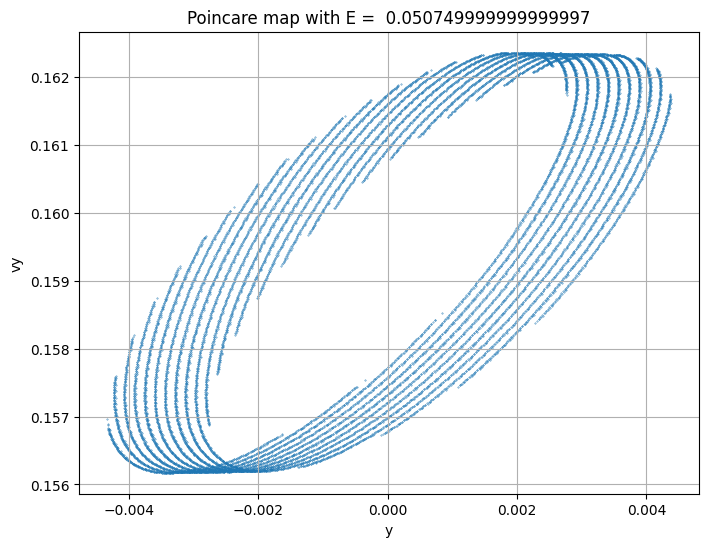

Simulating With energy =  0.05107565


100%|██████████| 9999999/9999999 [00:21<00:00, 468952.04it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05107565


100%|██████████| 9999999/9999999 [00:04<00:00, 2450443.36it/s]


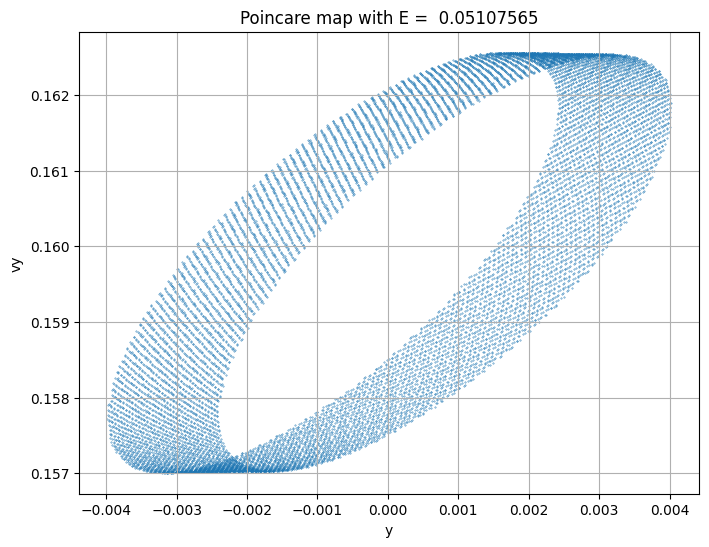

Simulating With energy =  0.0514026


100%|██████████| 9999999/9999999 [00:22<00:00, 439018.83it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.0514026


100%|██████████| 9999999/9999999 [00:03<00:00, 2513383.57it/s]


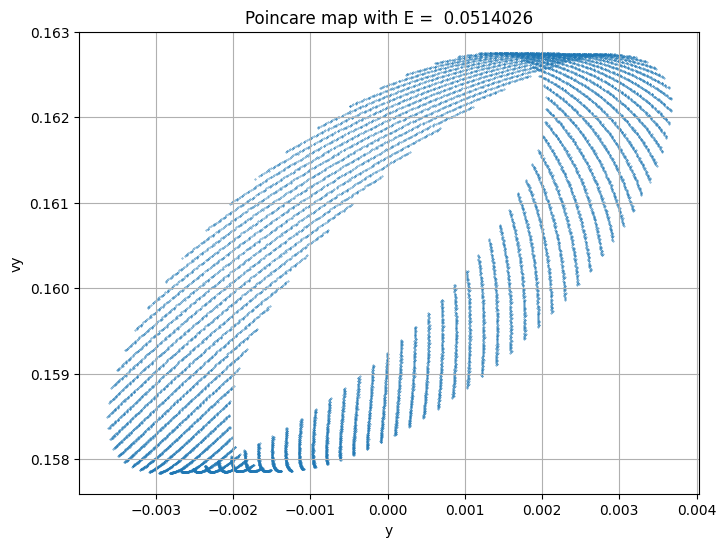

Simulating With energy =  0.05173085


100%|██████████| 9999999/9999999 [00:21<00:00, 458308.59it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05173085


100%|██████████| 9999999/9999999 [00:03<00:00, 2812478.95it/s]


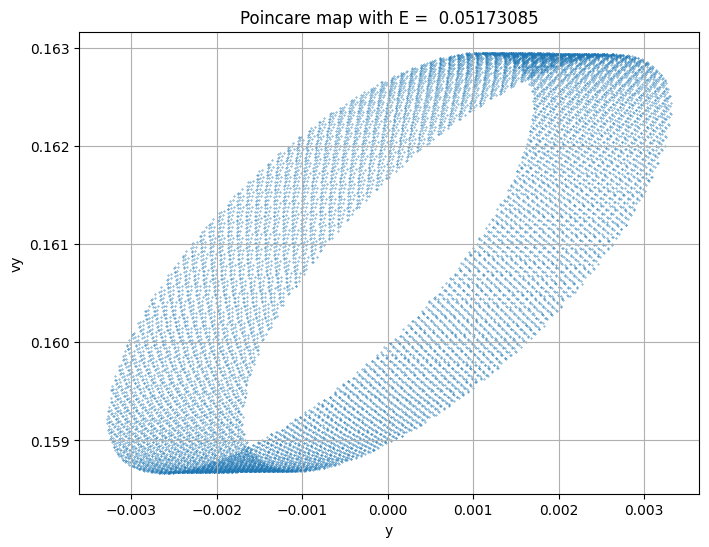

Simulating With energy =  0.05206040000000001


100%|██████████| 9999999/9999999 [00:20<00:00, 477018.08it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05206040000000001


100%|██████████| 9999999/9999999 [00:03<00:00, 2555017.90it/s]


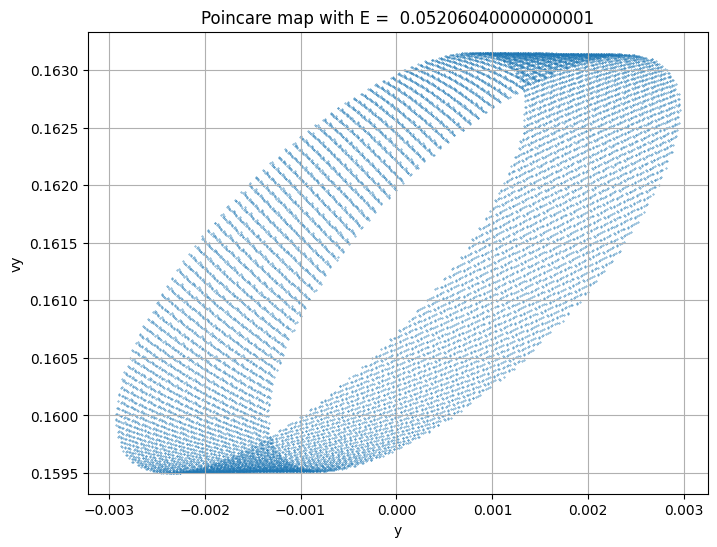

Simulating With energy =  0.05239125


100%|██████████| 9999999/9999999 [00:21<00:00, 454781.17it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05239125


100%|██████████| 9999999/9999999 [00:03<00:00, 2509629.02it/s]


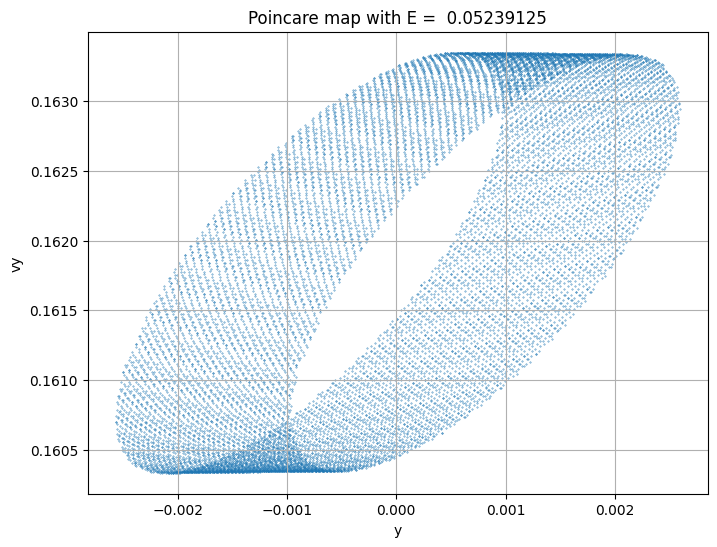

Simulating With energy =  0.052723400000000004


100%|██████████| 9999999/9999999 [00:21<00:00, 461653.00it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.052723400000000004


100%|██████████| 9999999/9999999 [00:03<00:00, 2735424.18it/s]


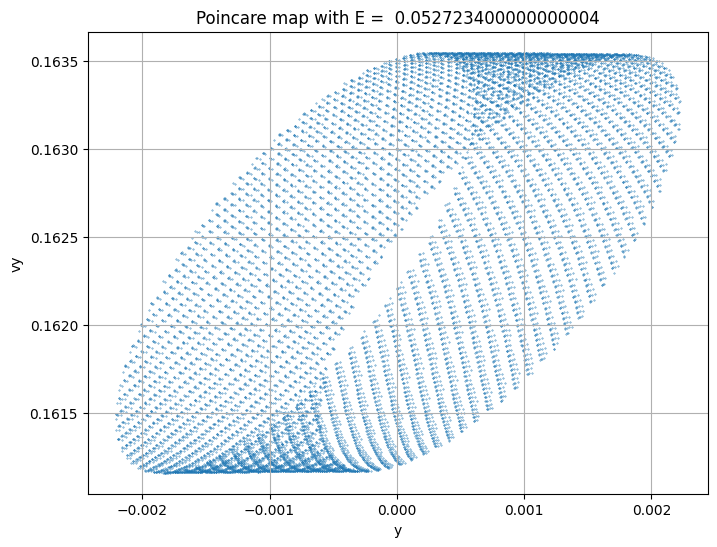

Simulating With energy =  0.053056849999999996


100%|██████████| 9999999/9999999 [00:21<00:00, 474397.11it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.053056849999999996


100%|██████████| 9999999/9999999 [00:03<00:00, 2797521.51it/s]


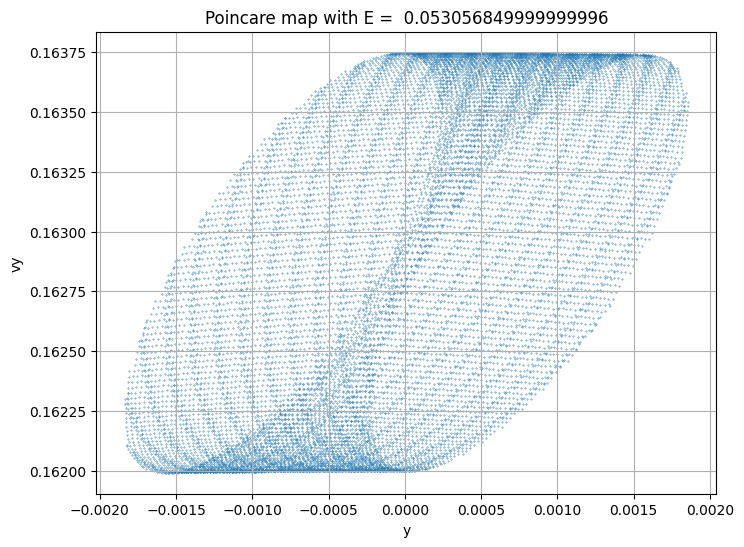

Simulating With energy =  0.053391600000000004


100%|██████████| 9999999/9999999 [00:21<00:00, 474779.08it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.053391600000000004


100%|██████████| 9999999/9999999 [00:03<00:00, 2761328.65it/s]


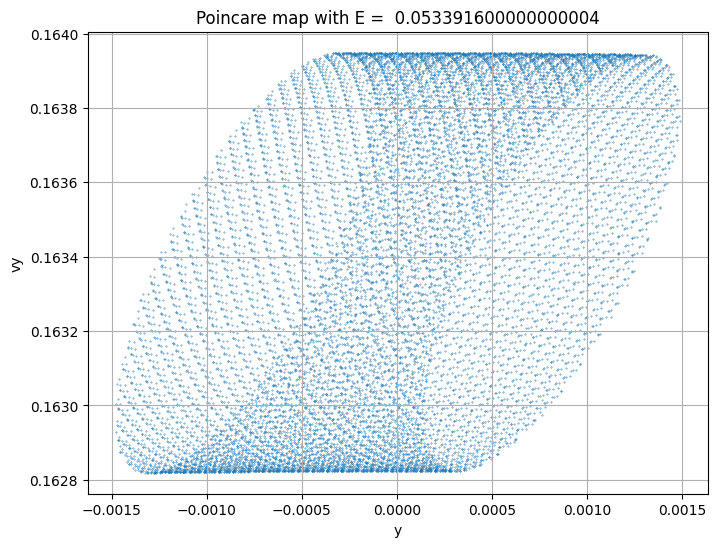

Simulating With energy =  0.05372765


100%|██████████| 9999999/9999999 [00:21<00:00, 469029.34it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05372765


100%|██████████| 9999999/9999999 [00:04<00:00, 2123647.16it/s]


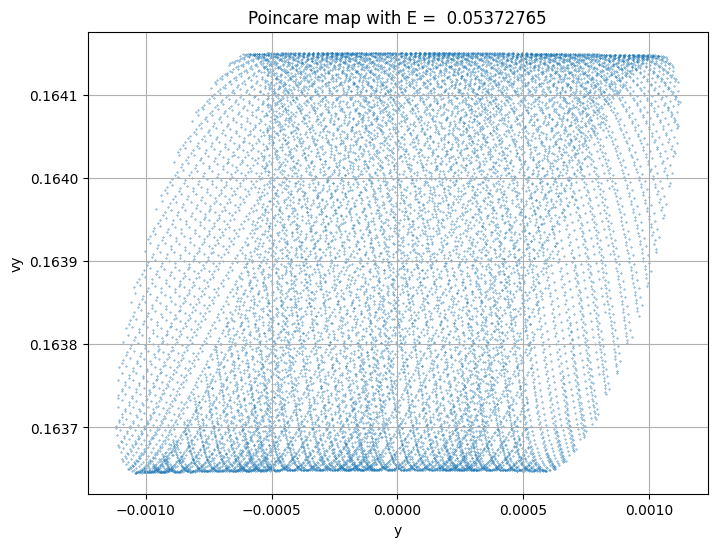

Simulating With energy =  0.05406500000000001


100%|██████████| 9999999/9999999 [00:23<00:00, 416676.16it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05406500000000001


100%|██████████| 9999999/9999999 [00:05<00:00, 1774243.55it/s]


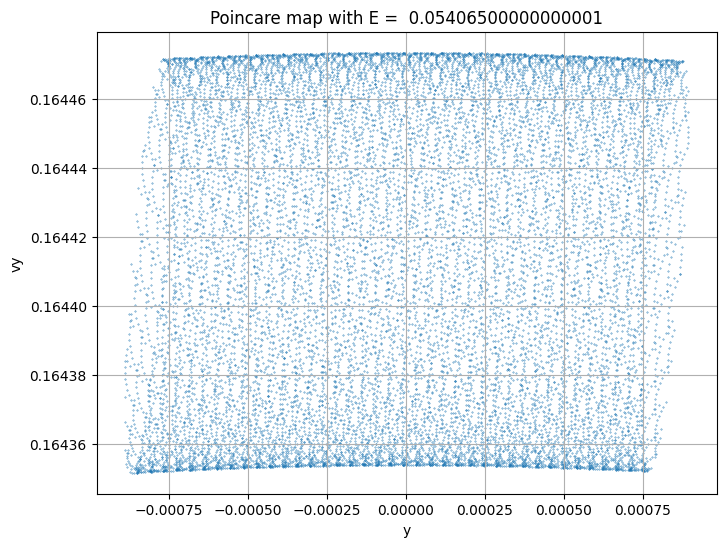

Simulating With energy =  0.054403650000000005


100%|██████████| 9999999/9999999 [00:26<00:00, 377375.25it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.054403650000000005


100%|██████████| 9999999/9999999 [00:05<00:00, 1984269.01it/s]


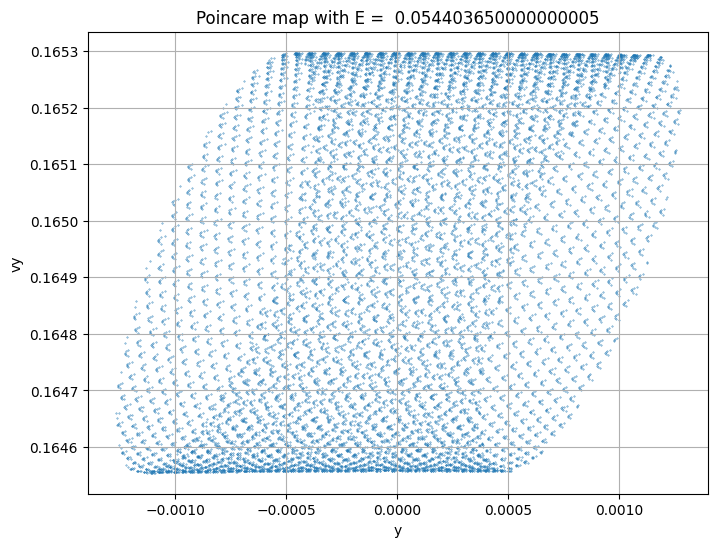

Simulating With energy =  0.0547436


100%|██████████| 9999999/9999999 [00:28<00:00, 349202.66it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.0547436


100%|██████████| 9999999/9999999 [00:03<00:00, 2726772.58it/s]


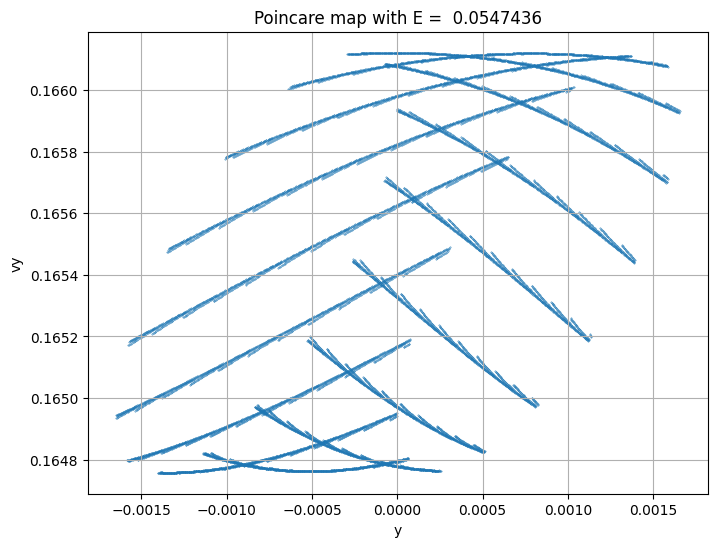

Simulating With energy =  0.055084850000000005


100%|██████████| 9999999/9999999 [00:21<00:00, 462161.85it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.055084850000000005


100%|██████████| 9999999/9999999 [00:03<00:00, 2611452.56it/s]


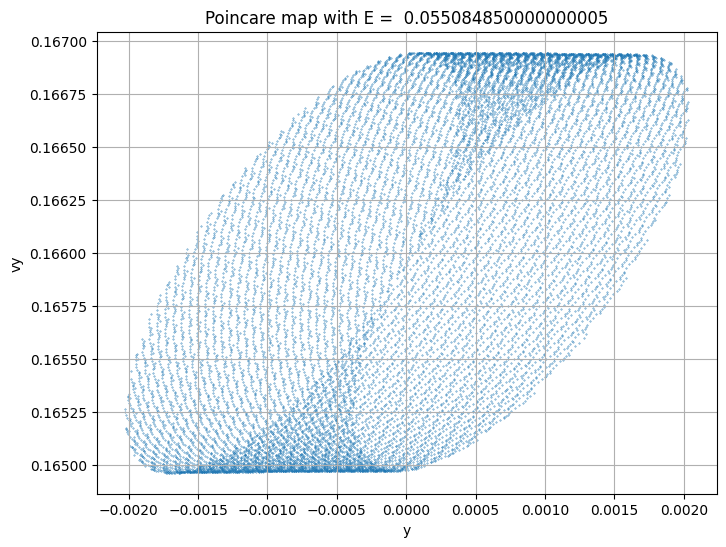

Simulating With energy =  0.0554274


100%|██████████| 9999999/9999999 [00:20<00:00, 478831.77it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.0554274


100%|██████████| 9999999/9999999 [00:03<00:00, 2770912.45it/s]


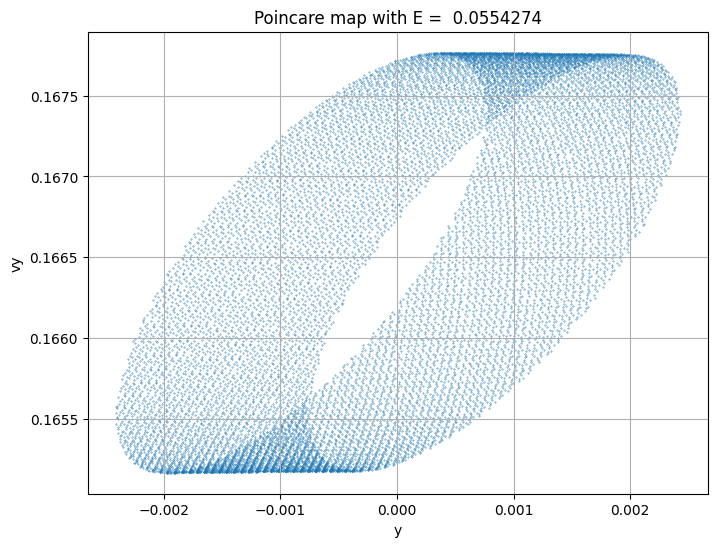

Simulating With energy =  0.05577125


100%|██████████| 9999999/9999999 [00:23<00:00, 434454.69it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05577125


100%|██████████| 9999999/9999999 [00:04<00:00, 2380632.10it/s]


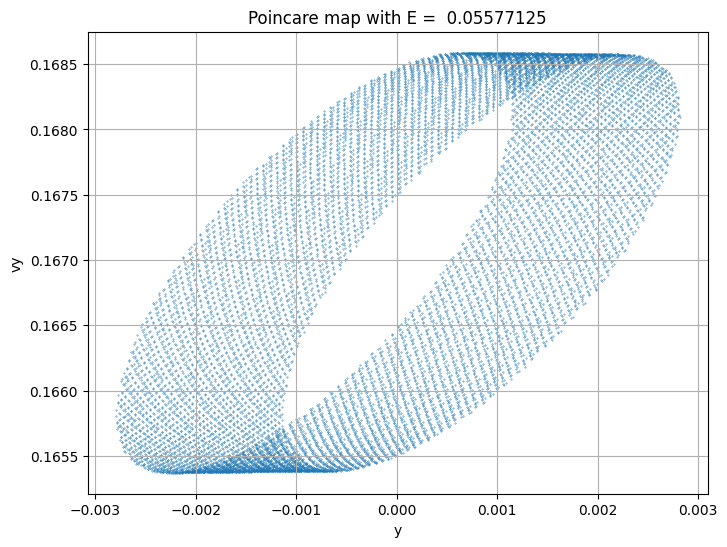

Simulating With energy =  0.056116400000000004


100%|██████████| 9999999/9999999 [00:24<00:00, 401416.31it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.056116400000000004


100%|██████████| 9999999/9999999 [00:04<00:00, 2400245.83it/s]


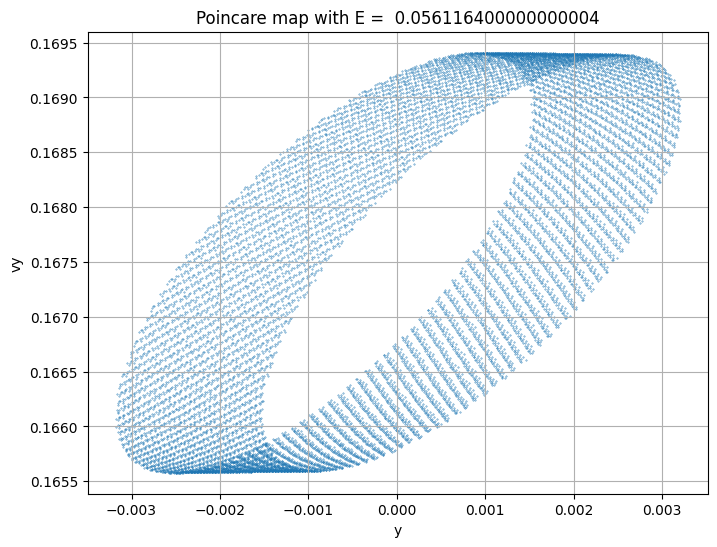

Simulating With energy =  0.05646285000000001


100%|██████████| 9999999/9999999 [00:24<00:00, 412946.71it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05646285000000001


100%|██████████| 9999999/9999999 [00:04<00:00, 2306149.60it/s]


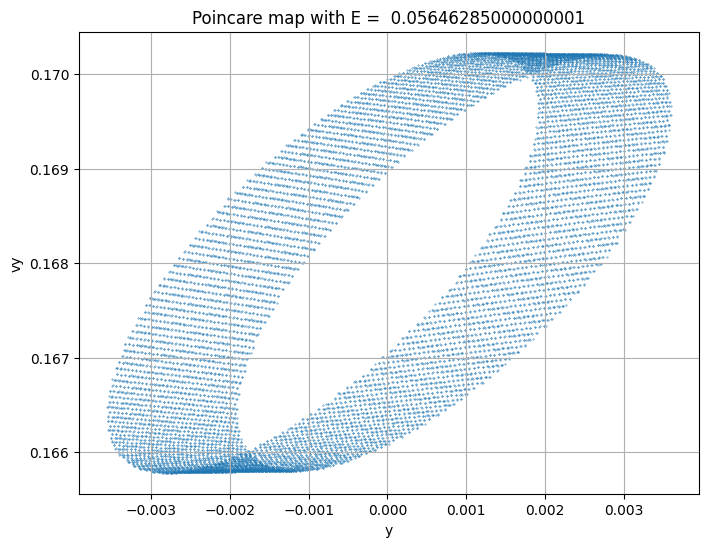

Simulating With energy =  0.05681060000000001


100%|██████████| 9999999/9999999 [00:23<00:00, 421042.06it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.05681060000000001


100%|██████████| 9999999/9999999 [00:04<00:00, 2358937.87it/s]


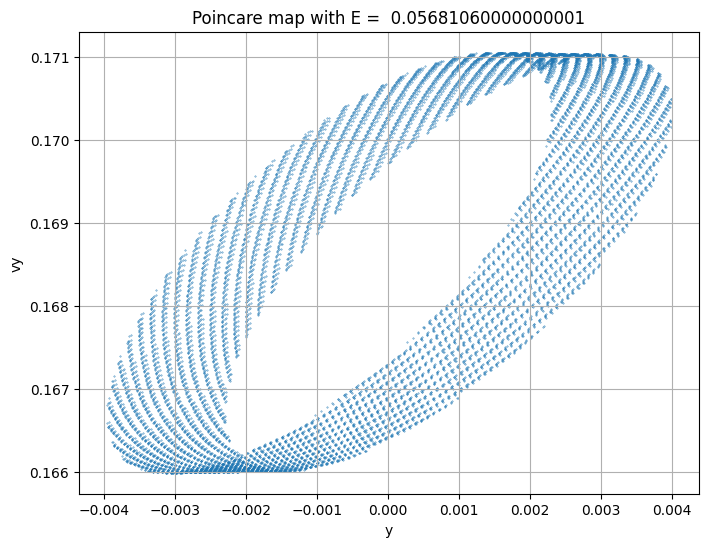

Simulating With energy =  0.057159650000000006


100%|██████████| 9999999/9999999 [00:23<00:00, 425695.93it/s]


Simulation Complete.
Plotting results...
Plotting With energy =  0.057159650000000006


100%|██████████| 9999999/9999999 [00:03<00:00, 2553491.02it/s]


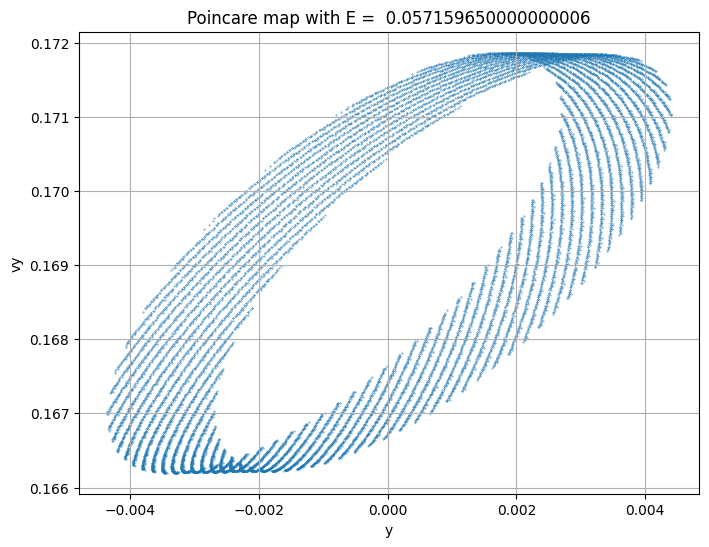

In [35]:
# Time parameters
t_0 = 0
t_end = 100000  # Choose an appropriate end time
dt = 0.01  # Time step size

# Number of steps
num_steps = int((t_end - t_0) / dt)
t_values = np.linspace(t_0, t_end, num_steps)




print("============================================================")
print("Beginning simulation....")
print("============================================================")
things_to_plot = []
for index in range(number_of_plots):
    # Create a 2D array to store results (each column represents x, y, vx, vy)
    results = np.zeros((num_steps, 4))
    # Set initial values
    results[0] = [x_0 + perturbation * index, y_0, vx_0, vy_0]
    print("Simulating With energy = ", energy(x_0 + perturbation * index, y_0, vx_0, vy_0) )
    if energy(x_0 + perturbation * index, y_0, vx_0, vy_0) > (1/6):
        print("Energy is Greater than the Chaos Threshold. Halting Simulation")
        break
    # Run the simulation using RK4 method
    for i in tqdm(range(1, num_steps)):
        x, y, vx, vy = results[i-1]
        x_new, y_new, vx_new, vy_new = rk4_step(x, y, vx, vy, dt)
        results[i] = [x_new, y_new, vx_new, vy_new]
    print("Simulation Complete.")
    print("Plotting results...")
    print("================================================================")
    filename = "images/poincare_map_" + str(index) + ".png"
    plot_and_save_poincare_map([results,], filename)

print("================================================================")




## Calculating the Lyapunov Exponent of the Poincare Map

Initial Values are: 0.25 0.15 0 0
Energy is equal to: 0.050749999999999997
Perturbed Energy is equal to: 0.16619
Initializing Arrays...
Arrays Initialized.
Beginning simulation....
Simulating With energy =  0.050749999999999997


100%|██████████| 99999/99999 [00:00<00:00, 380422.27it/s]


Simulation Complete.
Plotting results...
2.0154343237760434e-06
Simulating With energy =  0.05107565


100%|██████████| 99999/99999 [00:00<00:00, 454608.35it/s]


Simulation Complete.
Plotting results...
4.612158306970243e-05
Simulating With energy =  0.0514026


100%|██████████| 99999/99999 [00:00<00:00, 451063.82it/s]


Simulation Complete.
Plotting results...
4.7246443436436714e-05
Simulating With energy =  0.05173085


100%|██████████| 99999/99999 [00:00<00:00, 461024.95it/s]


Simulation Complete.
Plotting results...
4.7971877583209314e-05
Simulating With energy =  0.05206040000000001


100%|██████████| 99999/99999 [00:00<00:00, 460595.62it/s]


Simulation Complete.
Plotting results...
4.82222129774315e-05
Simulating With energy =  0.05239125


100%|██████████| 99999/99999 [00:00<00:00, 460956.55it/s]


Simulation Complete.
Plotting results...
4.839940127039597e-05
Simulating With energy =  0.052723400000000004


100%|██████████| 99999/99999 [00:00<00:00, 463270.60it/s]


Simulation Complete.
Plotting results...
4.906742047075821e-05
Simulating With energy =  0.053056849999999996


100%|██████████| 99999/99999 [00:00<00:00, 457911.87it/s]


Simulation Complete.
Plotting results...
4.995503606739554e-05
Simulating With energy =  0.053391600000000004


100%|██████████| 99999/99999 [00:00<00:00, 433352.42it/s]


Simulation Complete.
Plotting results...
5.025021307987326e-05
Simulating With energy =  0.05372765


100%|██████████| 99999/99999 [00:00<00:00, 472828.92it/s]


Simulation Complete.
Plotting results...
4.973775725853817e-05
Simulating With energy =  0.05406500000000001


100%|██████████| 99999/99999 [00:00<00:00, 408536.26it/s]


Simulation Complete.
Plotting results...
4.9065075820937086e-05
Simulating With energy =  0.054403650000000005


100%|██████████| 99999/99999 [00:00<00:00, 337057.45it/s]


Simulation Complete.
Plotting results...
4.8925133581166714e-05
Simulating With energy =  0.0547436


100%|██████████| 99999/99999 [00:00<00:00, 453053.66it/s]


Simulation Complete.
Plotting results...
4.8955711357202637e-05
Simulating With energy =  0.055084850000000005


100%|██████████| 99999/99999 [00:00<00:00, 464931.88it/s]


Simulation Complete.
Plotting results...
4.85176001799338e-05
Simulating With energy =  0.0554274


100%|██████████| 99999/99999 [00:00<00:00, 455655.36it/s]


Simulation Complete.
Plotting results...
4.7509971701077595e-05
Simulating With energy =  0.05577125


100%|██████████| 99999/99999 [00:00<00:00, 456136.03it/s]


Simulation Complete.
Plotting results...
4.638289470457488e-05
Simulating With energy =  0.056116400000000004


100%|██████████| 99999/99999 [00:00<00:00, 460929.70it/s]


Simulation Complete.
Plotting results...
4.601393540216738e-05
Simulating With energy =  0.05646285000000001


100%|██████████| 99999/99999 [00:00<00:00, 476427.95it/s]


Simulation Complete.
Plotting results...
4.684962129881246e-05
Simulating With energy =  0.05681060000000001


100%|██████████| 99999/99999 [00:00<00:00, 449116.39it/s]


Simulation Complete.
Plotting results...
4.8214375505956315e-05
Simulating With energy =  0.057159650000000006


100%|██████████| 99999/99999 [00:00<00:00, 450026.67it/s]


Simulation Complete.
Plotting results...
4.927314775120729e-05
Simulating With energy =  0.057510000000000006


100%|██████████| 99999/99999 [00:00<00:00, 467323.08it/s]


Simulation Complete.
Plotting results...
4.970169772712744e-05
Simulating With energy =  0.05786165


100%|██████████| 99999/99999 [00:00<00:00, 452329.56it/s]


Simulation Complete.
Plotting results...
4.985296173375076e-05
Simulating With energy =  0.058214600000000005


100%|██████████| 99999/99999 [00:00<00:00, 361853.50it/s]


Simulation Complete.
Plotting results...
5.053819544981807e-05
Simulating With energy =  0.058568850000000006


100%|██████████| 99999/99999 [00:00<00:00, 465972.17it/s]


Simulation Complete.
Plotting results...
5.152539574230898e-05
Simulating With energy =  0.058924400000000016


100%|██████████| 99999/99999 [00:00<00:00, 406039.88it/s]


Simulation Complete.
Plotting results...
5.172877575853885e-05
Simulating With energy =  0.05928125000000001


100%|██████████| 99999/99999 [00:00<00:00, 453087.92it/s]


Simulation Complete.
Plotting results...
5.100205047360979e-05
Simulating With energy =  0.05963940000000001


100%|██████████| 99999/99999 [00:00<00:00, 480347.75it/s]


Simulation Complete.
Plotting results...
5.0385169130885695e-05
Simulating With energy =  0.059998850000000006


100%|██████████| 99999/99999 [00:00<00:00, 445076.88it/s]


Simulation Complete.
Plotting results...
5.0393892761055265e-05
Simulating With energy =  0.06035960000000001


100%|██████████| 99999/99999 [00:00<00:00, 468142.00it/s]


Simulation Complete.
Plotting results...
5.017678811544044e-05
Simulating With energy =  0.06072165000000001


100%|██████████| 99999/99999 [00:00<00:00, 470628.20it/s]


Simulation Complete.
Plotting results...
4.9217226922968934e-05
Simulating With energy =  0.061085000000000014


100%|██████████| 99999/99999 [00:00<00:00, 459141.99it/s]


Simulation Complete.
Plotting results...
4.783979445467581e-05
Simulating With energy =  0.061449650000000015


100%|██████████| 99999/99999 [00:00<00:00, 458028.88it/s]


Simulation Complete.
Plotting results...
4.712945134326057e-05
Simulating With energy =  0.061815600000000005


100%|██████████| 99999/99999 [00:00<00:00, 336231.45it/s]


Simulation Complete.
Plotting results...
4.7931349490785113e-05
Simulating With energy =  0.06218285000000001


100%|██████████| 99999/99999 [00:00<00:00, 436625.31it/s]


Simulation Complete.
Plotting results...
4.949799593770903e-05
Simulating With energy =  0.06255140000000002


100%|██████████| 99999/99999 [00:00<00:00, 465088.09it/s]


Simulation Complete.
Plotting results...
5.069148029544505e-05
Simulating With energy =  0.06292125000000001


100%|██████████| 99999/99999 [00:00<00:00, 449252.05it/s]


Simulation Complete.
Plotting results...
5.108988831161374e-05
Simulating With energy =  0.06329240000000001


100%|██████████| 99999/99999 [00:00<00:00, 472561.49it/s]


Simulation Complete.
Plotting results...
5.1304301381379877e-05
Simulating With energy =  0.06366485


100%|██████████| 99999/99999 [00:00<00:00, 463698.26it/s]


Simulation Complete.
Plotting results...
5.229350925031562e-05
Simulating With energy =  0.06403859999999999


100%|██████████| 99999/99999 [00:00<00:00, 453378.84it/s]


Simulation Complete.
Plotting results...
5.315149988599951e-05
Simulating With energy =  0.06441364999999999


100%|██████████| 99999/99999 [00:00<00:00, 457455.89it/s]


Simulation Complete.
Plotting results...
5.2735711537358245e-05
Simulating With energy =  0.06479


100%|██████████| 99999/99999 [00:00<00:00, 467624.24it/s]


Simulation Complete.
Plotting results...
5.181230126509426e-05
Simulating With energy =  0.06516765


100%|██████████| 99999/99999 [00:00<00:00, 453875.84it/s]


Simulation Complete.
Plotting results...
5.1681964045421084e-05
Simulating With energy =  0.0655466


100%|██████████| 99999/99999 [00:00<00:00, 476993.07it/s]


Simulation Complete.
Plotting results...
5.1552088054421804e-05
Simulating With energy =  0.06592685


100%|██████████| 99999/99999 [00:00<00:00, 433765.18it/s]


Simulation Complete.
Plotting results...
5.051231861037263e-05
Simulating With energy =  0.06630839999999999


100%|██████████| 99999/99999 [00:00<00:00, 309374.56it/s]


Simulation Complete.
Plotting results...
4.892189959402432e-05
Simulating With energy =  0.06669125


100%|██████████| 99999/99999 [00:00<00:00, 441198.00it/s]


Simulation Complete.
Plotting results...
4.815783932220898e-05
Simulating With energy =  0.0670754


100%|██████████| 99999/99999 [00:00<00:00, 466544.91it/s]


Simulation Complete.
Plotting results...
4.925004173280899e-05
Simulating With energy =  0.06746085


100%|██████████| 99999/99999 [00:00<00:00, 396797.63it/s]


Simulation Complete.
Plotting results...
5.1031792329769143e-05
Simulating With energy =  0.0678476


100%|██████████| 99999/99999 [00:00<00:00, 452449.11it/s]


Simulation Complete.
Plotting results...
5.210587808166518e-05
Simulating With energy =  0.06823565


100%|██████████| 99999/99999 [00:00<00:00, 453890.08it/s]


Simulation Complete.
Plotting results...
5.235380477540719e-05
Simulating With energy =  0.06862499999999999


100%|██████████| 99999/99999 [00:00<00:00, 443780.90it/s]


Simulation Complete.
Plotting results...
5.296040285896585e-05
Simulating With energy =  0.06901564999999998


100%|██████████| 99999/99999 [00:00<00:00, 467984.77it/s]


Simulation Complete.
Plotting results...
5.4164911343237466e-05
Simulating With energy =  0.0694076


100%|██████████| 99999/99999 [00:00<00:00, 450750.67it/s]


Simulation Complete.
Plotting results...
5.423570115173096e-05
Simulating With energy =  0.06980085


100%|██████████| 99999/99999 [00:00<00:00, 465687.61it/s]


Simulation Complete.
Plotting results...
5.323795008221541e-05
Simulating With energy =  0.07019539999999999


100%|██████████| 99999/99999 [00:00<00:00, 464376.97it/s]


Simulation Complete.
Plotting results...
5.2886270549637816e-05
Simulating With energy =  0.07059125


100%|██████████| 99999/99999 [00:00<00:00, 334522.68it/s]


Simulation Complete.
Plotting results...
5.273305405516397e-05
Simulating With energy =  0.0709884


100%|██████████| 99999/99999 [00:00<00:00, 456035.85it/s]


Simulation Complete.
Plotting results...
5.162827824291151e-05
Simulating With energy =  0.07138685


100%|██████████| 99999/99999 [00:00<00:00, 449243.39it/s]


Simulation Complete.
Plotting results...
4.986270182299807e-05
Simulating With energy =  0.0717866


100%|██████████| 99999/99999 [00:00<00:00, 468456.76it/s]


Simulation Complete.
Plotting results...
4.9150394644875395e-05
Simulating With energy =  0.07218765


100%|██████████| 99999/99999 [00:00<00:00, 460518.75it/s]


Simulation Complete.
Plotting results...
5.0608912467025936e-05
Simulating With energy =  0.07259


100%|██████████| 99999/99999 [00:00<00:00, 459563.07it/s]


Simulation Complete.
Plotting results...
5.249243157647028e-05
Simulating With energy =  0.07299365


100%|██████████| 99999/99999 [00:00<00:00, 453886.64it/s]


Simulation Complete.
Plotting results...
5.3453463936840244e-05
Simulating With energy =  0.07339860000000001


100%|██████████| 99999/99999 [00:00<00:00, 431548.84it/s]


Simulation Complete.
Plotting results...
5.3637348199555135e-05
Simulating With energy =  0.07380484999999999


100%|██████████| 99999/99999 [00:00<00:00, 449978.87it/s]


Simulation Complete.
Plotting results...
5.4706407683324885e-05
Simulating With energy =  0.07421240000000001


100%|██████████| 99999/99999 [00:00<00:00, 455842.56it/s]


Simulation Complete.
Plotting results...
5.5611206405591586e-05
Simulating With energy =  0.07462125


100%|██████████| 99999/99999 [00:00<00:00, 442476.58it/s]


Simulation Complete.
Plotting results...
5.4710099255888796e-05
Simulating With energy =  0.0750314


100%|██████████| 99999/99999 [00:00<00:00, 329806.29it/s]


Simulation Complete.
Plotting results...
5.391986376059885e-05
Simulating With energy =  0.07544285


100%|██████████| 99999/99999 [00:00<00:00, 454000.62it/s]


Simulation Complete.
Plotting results...
5.394621391119982e-05
Simulating With energy =  0.07585560000000001


100%|██████████| 99999/99999 [00:00<00:00, 470537.92it/s]


Simulation Complete.
Plotting results...
5.2837460990768524e-05
Simulating With energy =  0.07626965000000001


100%|██████████| 99999/99999 [00:00<00:00, 450805.42it/s]


Simulation Complete.
Plotting results...
5.0738542252424204e-05
Simulating With energy =  0.076685


100%|██████████| 99999/99999 [00:00<00:00, 409619.51it/s]


Simulation Complete.
Plotting results...
4.998987094092855e-05
Simulating With energy =  0.07710165000000001


100%|██████████| 99999/99999 [00:00<00:00, 446989.36it/s]


Simulation Complete.
Plotting results...
5.18180880641473e-05
Simulating With energy =  0.07751960000000001


100%|██████████| 99999/99999 [00:00<00:00, 454887.41it/s]


Simulation Complete.
Plotting results...
5.384050897609897e-05
Simulating With energy =  0.07793885


100%|██████████| 99999/99999 [00:00<00:00, 448968.32it/s]


Simulation Complete.
Plotting results...
5.44861897755172e-05
Simulating With energy =  0.07835940000000001


100%|██████████| 99999/99999 [00:00<00:00, 454286.32it/s]


Simulation Complete.
Plotting results...
5.495777682211107e-05
Simulating With energy =  0.07878125000000001


100%|██████████| 99999/99999 [00:00<00:00, 463153.96it/s]


Simulation Complete.
Plotting results...
5.637949603605568e-05
Simulating With energy =  0.07920440000000001


100%|██████████| 99999/99999 [00:00<00:00, 462669.11it/s]


Simulation Complete.
Plotting results...
5.633250553307334e-05
Simulating With energy =  0.07962885000000001


100%|██████████| 99999/99999 [00:00<00:00, 334068.92it/s]


Simulation Complete.
Plotting results...
5.522033306144266e-05
Simulating With energy =  0.0800546


100%|██████████| 99999/99999 [00:00<00:00, 458879.27it/s]


Simulation Complete.
Plotting results...
5.503164117511204e-05
Simulating With energy =  0.08048165


100%|██████████| 99999/99999 [00:00<00:00, 449299.21it/s]


Simulation Complete.
Plotting results...
5.4214442443397545e-05
Simulating With energy =  0.08091000000000001


100%|██████████| 99999/99999 [00:00<00:00, 429670.41it/s]


Simulation Complete.
Plotting results...
5.2184984750031905e-05
Simulating With energy =  0.08133965000000001


100%|██████████| 99999/99999 [00:00<00:00, 436258.36it/s]


Simulation Complete.
Plotting results...
5.074662932691659e-05
Simulating With energy =  0.08177060000000001


100%|██████████| 99999/99999 [00:00<00:00, 438611.51it/s]


Simulation Complete.
Plotting results...
5.2366248538894394e-05
Simulating With energy =  0.08220285000000001


100%|██████████| 99999/99999 [00:00<00:00, 453426.87it/s]


Simulation Complete.
Plotting results...
5.470895755908187e-05
Simulating With energy =  0.08263640000000001


100%|██████████| 99999/99999 [00:00<00:00, 466014.62it/s]


Simulation Complete.
Plotting results...
5.5617116050576734e-05
Simulating With energy =  0.08307125000000001


100%|██████████| 99999/99999 [00:00<00:00, 443139.49it/s]


Simulation Complete.
Plotting results...
5.59489572733869e-05
Simulating With energy =  0.08350740000000001


100%|██████████| 99999/99999 [00:00<00:00, 469148.43it/s]


Simulation Complete.
Plotting results...
5.7580316210849735e-05
Simulating With energy =  0.08394485000000002


100%|██████████| 99999/99999 [00:00<00:00, 334441.05it/s]


Simulation Complete.
Plotting results...
5.707371672565456e-05
Simulating With energy =  0.08438359999999999


100%|██████████| 99999/99999 [00:00<00:00, 443285.14it/s]


Simulation Complete.
Plotting results...
5.592724116786245e-05
Simulating With energy =  0.08482364999999999


100%|██████████| 99999/99999 [00:00<00:00, 447706.96it/s]


Simulation Complete.
Plotting results...
5.596817016859756e-05
Simulating With energy =  0.08526499999999998


100%|██████████| 99999/99999 [00:00<00:00, 396603.27it/s]


Simulation Complete.
Plotting results...
5.420759614836072e-05
Simulating With energy =  0.08570765


100%|██████████| 99999/99999 [00:00<00:00, 445324.02it/s]


Simulation Complete.
Plotting results...
5.183332272296126e-05
Simulating With energy =  0.08615159999999998


100%|██████████| 99999/99999 [00:00<00:00, 459998.03it/s]


Simulation Complete.
Plotting results...
5.221015209175938e-05
Simulating With energy =  0.08659684999999998


100%|██████████| 99999/99999 [00:00<00:00, 444537.70it/s]


Simulation Complete.
Plotting results...
5.487820290184852e-05
Simulating With energy =  0.08704339999999999


100%|██████████| 99999/99999 [00:00<00:00, 453493.06it/s]


Simulation Complete.
Plotting results...
5.633255394754796e-05
Simulating With energy =  0.08749124999999999


100%|██████████| 99999/99999 [00:00<00:00, 435714.07it/s]


Simulation Complete.
Plotting results...
5.682670601509549e-05
Simulating With energy =  0.08794039999999999


100%|██████████| 99999/99999 [00:00<00:00, 443872.95it/s]


Simulation Complete.
Plotting results...
5.821257505425491e-05
Simulating With energy =  0.08839084999999999


100%|██████████| 99999/99999 [00:00<00:00, 449317.50it/s]


Simulation Complete.
Plotting results...
5.8224832589661945e-05
Simulating With energy =  0.0888426


100%|██████████| 99999/99999 [00:00<00:00, 327696.18it/s]


Simulation Complete.
Plotting results...
5.6890102532886e-05
Simulating With energy =  0.08929564999999999


100%|██████████| 99999/99999 [00:00<00:00, 428575.87it/s]


Simulation Complete.
Plotting results...
5.6719003289236285e-05
Simulating With energy =  0.08975


100%|██████████| 99999/99999 [00:00<00:00, 465532.03it/s]


Simulation Complete.
Plotting results...
5.493700461437652e-05
Simulating With energy =  0.09020565


100%|██████████| 99999/99999 [00:00<00:00, 440980.45it/s]


Simulation Complete.
Plotting results...
5.222936773911447e-05
Simulating With energy =  0.09066259999999998


100%|██████████| 99999/99999 [00:00<00:00, 429915.72it/s]


Simulation Complete.
Plotting results...
5.3340147252392545e-05
Simulating With energy =  0.09112084999999999


100%|██████████| 99999/99999 [00:00<00:00, 441636.55it/s]


Simulation Complete.
Plotting results...
5.643776874262076e-05
Simulating With energy =  0.09158039999999998


100%|██████████| 99999/99999 [00:00<00:00, 449589.62it/s]


Simulation Complete.
Plotting results...
5.725791727990906e-05
Simulating With energy =  0.09204124999999999


100%|██████████| 99999/99999 [00:00<00:00, 412756.88it/s]


Simulation Complete.
Plotting results...
5.8233681696351775e-05
Simulating With energy =  0.09250339999999999


100%|██████████| 99999/99999 [00:00<00:00, 411783.10it/s]


Simulation Complete.
Plotting results...
5.9435776155583024e-05
Simulating With energy =  0.09296684999999998


100%|██████████| 99999/99999 [00:00<00:00, 387144.90it/s]


Simulation Complete.
Plotting results...
5.8226604481676704e-05
Simulating With energy =  0.09343159999999999


100%|██████████| 99999/99999 [00:00<00:00, 293712.33it/s]


Simulation Complete.
Plotting results...
5.775926055943772e-05
Simulating With energy =  0.09389765


100%|██████████| 99999/99999 [00:00<00:00, 426390.44it/s]


Simulation Complete.
Plotting results...
5.6420687662109545e-05
Simulating With energy =  0.09436499999999999


100%|██████████| 99999/99999 [00:00<00:00, 415946.81it/s]


Simulation Complete.
Plotting results...
5.389476451509512e-05
Simulating With energy =  0.09483364999999999


100%|██████████| 99999/99999 [00:00<00:00, 367654.88it/s]


Simulation Complete.
Plotting results...
5.332470917507221e-05
Simulating With energy =  0.09530359999999999


100%|██████████| 99999/99999 [00:00<00:00, 436820.85it/s]


Simulation Complete.
Plotting results...
5.665214823122616e-05
Simulating With energy =  0.09577485


100%|██████████| 99999/99999 [00:00<00:00, 393542.15it/s]


Simulation Complete.
Plotting results...
5.824564563723977e-05
Simulating With energy =  0.0962474


100%|██████████| 99999/99999 [00:00<00:00, 402649.80it/s]


Simulation Complete.
Plotting results...
5.8763324738919565e-05
Simulating With energy =  0.09672124999999998


100%|██████████| 99999/99999 [00:00<00:00, 418818.50it/s]


Simulation Complete.
Plotting results...
6.043134939035685e-05
Simulating With energy =  0.09719639999999999


100%|██████████| 99999/99999 [00:00<00:00, 446157.27it/s]


Simulation Complete.
Plotting results...
5.8787683039623815e-05
Simulating With energy =  0.09767284999999999


100%|██████████| 99999/99999 [00:00<00:00, 449272.74it/s]


Simulation Complete.
Plotting results...
5.8695696715621664e-05
Simulating With energy =  0.09815059999999999


100%|██████████| 99999/99999 [00:00<00:00, 315442.96it/s]


Simulation Complete.
Plotting results...
5.665038137665838e-05
Simulating With energy =  0.09862965


100%|██████████| 99999/99999 [00:00<00:00, 451557.21it/s]


Simulation Complete.
Plotting results...
5.3697890497728756e-05
Simulating With energy =  0.09910999999999999


100%|██████████| 99999/99999 [00:00<00:00, 433079.92it/s]


Simulation Complete.
Plotting results...
5.501604501163135e-05
Simulating With energy =  0.09959164999999999


100%|██████████| 99999/99999 [00:00<00:00, 397984.40it/s]


Simulation Complete.
Plotting results...
5.821945668535634e-05
Simulating With energy =  0.1000746


100%|██████████| 99999/99999 [00:00<00:00, 352933.53it/s]


Simulation Complete.
Plotting results...
5.9119270346801424e-05
Simulating With energy =  0.10055884999999999


100%|██████████| 99999/99999 [00:00<00:00, 416006.63it/s]


Simulation Complete.
Plotting results...
6.05438243564606e-05
Simulating With energy =  0.10104439999999999


100%|██████████| 99999/99999 [00:00<00:00, 449853.87it/s]


Simulation Complete.
Plotting results...
6.058138620736215e-05
Simulating With energy =  0.10153124999999999


100%|██████████| 99999/99999 [00:00<00:00, 442016.80it/s]


Simulation Complete.
Plotting results...
5.936334605582452e-05
Simulating With energy =  0.1020194


100%|██████████| 99999/99999 [00:00<00:00, 435505.50it/s]


Simulation Complete.
Plotting results...
5.851375907534284e-05
Simulating With energy =  0.10250885


100%|██████████| 99999/99999 [00:00<00:00, 461666.88it/s]


Simulation Complete.
Plotting results...
5.505868420322398e-05
Simulating With energy =  0.1029996


100%|██████████| 99999/99999 [00:00<00:00, 283734.46it/s]


Simulation Complete.
Plotting results...
5.4827386081007796e-05
Simulating With energy =  0.10349164999999999


100%|██████████| 99999/99999 [00:00<00:00, 436448.12it/s]


Simulation Complete.
Plotting results...
5.826809424861592e-05
Simulating With energy =  0.103985


100%|██████████| 99999/99999 [00:00<00:00, 442893.35it/s]


Simulation Complete.
Plotting results...
6.000775180974474e-05
Simulating With energy =  0.10447965000000001


100%|██████████| 99999/99999 [00:00<00:00, 474820.15it/s]


Simulation Complete.
Plotting results...
6.09434269392568e-05
Simulating With energy =  0.10497559999999999


100%|██████████| 99999/99999 [00:00<00:00, 442036.37it/s]


Simulation Complete.
Plotting results...
6.154752582226133e-05
Simulating With energy =  0.10547285


100%|██████████| 99999/99999 [00:00<00:00, 428361.83it/s]


Simulation Complete.
Plotting results...
5.99958790057571e-05
Simulating With energy =  0.1059714


100%|██████████| 99999/99999 [00:00<00:00, 417144.84it/s]


Simulation Complete.
Plotting results...
5.912502731636302e-05
Simulating With energy =  0.10647124999999999


100%|██████████| 99999/99999 [00:00<00:00, 414438.85it/s]


Simulation Complete.
Plotting results...
5.519890769410047e-05
Simulating With energy =  0.10697240000000001


100%|██████████| 99999/99999 [00:00<00:00, 451795.55it/s]


Simulation Complete.
Plotting results...
5.6103462588702066e-05
Simulating With energy =  0.10747485000000001


100%|██████████| 99999/99999 [00:00<00:00, 416707.61it/s]


Simulation Complete.
Plotting results...
5.957404488234962e-05
Simulating With energy =  0.10797860000000001


100%|██████████| 99999/99999 [00:00<00:00, 318991.68it/s]


Simulation Complete.
Plotting results...
6.084159550872498e-05
Simulating With energy =  0.10848365


100%|██████████| 99999/99999 [00:00<00:00, 401052.77it/s]


Simulation Complete.
Plotting results...
6.24684127914167e-05
Simulating With energy =  0.10899


100%|██████████| 99999/99999 [00:00<00:00, 465817.95it/s]


Simulation Complete.
Plotting results...
6.130759038669172e-05
Simulating With energy =  0.10949765


100%|██████████| 99999/99999 [00:00<00:00, 446796.51it/s]


Simulation Complete.
Plotting results...
6.0978671463613875e-05
Simulating With energy =  0.11000660000000001


100%|██████████| 99999/99999 [00:00<00:00, 447163.77it/s]


Simulation Complete.
Plotting results...
5.7545826185350506e-05
Simulating With energy =  0.11051685


100%|██████████| 99999/99999 [00:00<00:00, 435581.04it/s]


Simulation Complete.
Plotting results...
5.538406698127878e-05
Simulating With energy =  0.1110284


100%|██████████| 99999/99999 [00:00<00:00, 412750.38it/s]


Simulation Complete.
Plotting results...
5.9711283714344544e-05
Simulating With energy =  0.11154125000000001


100%|██████████| 99999/99999 [00:00<00:00, 350514.67it/s]


Simulation Complete.
Plotting results...
6.179957579433801e-05
Simulating With energy =  0.1120554


100%|██████████| 99999/99999 [00:00<00:00, 365996.24it/s]


Simulation Complete.
Plotting results...
6.350783013533249e-05
Simulating With energy =  0.11257085000000001


100%|██████████| 99999/99999 [00:00<00:00, 410300.71it/s]


Simulation Complete.
Plotting results...
6.286667218405629e-05
Simulating With energy =  0.11308760000000001


100%|██████████| 99999/99999 [00:00<00:00, 317336.03it/s]


Simulation Complete.
Plotting results...
6.329788290360174e-05
Simulating With energy =  0.11360565


100%|██████████| 99999/99999 [00:00<00:00, 446779.86it/s]


Simulation Complete.
Plotting results...
6.367589936214285e-05
Simulating With energy =  0.11412500000000002


100%|██████████| 99999/99999 [00:00<00:00, 454903.20it/s]


Simulation Complete.
Plotting results...
4.514885626793828e-05
Simulating With energy =  0.11464565000000002


100%|██████████| 99999/99999 [00:00<00:00, 456621.20it/s]


Simulation Complete.
Plotting results...
3.7784215710700884e-05
Simulating With energy =  0.11516760000000001


100%|██████████| 99999/99999 [00:00<00:00, 418278.03it/s]


Simulation Complete.
Plotting results...
4.342185807323853e-05
Simulating With energy =  0.11569085000000001


100%|██████████| 99999/99999 [00:00<00:00, 455772.71it/s]


Simulation Complete.
Plotting results...
4.54724868627634e-05
Simulating With energy =  0.11621540000000001


100%|██████████| 99999/99999 [00:00<00:00, 442093.67it/s]


Simulation Complete.
Plotting results...
4.573542456665664e-05
Simulating With energy =  0.11674125000000002


100%|██████████| 99999/99999 [00:00<00:00, 427582.34it/s]


Simulation Complete.
Plotting results...
5.321399770188289e-05
Simulating With energy =  0.1172684


100%|██████████| 99999/99999 [00:00<00:00, 445051.85it/s]


Simulation Complete.
Plotting results...
5.5392946121192466e-05
Simulating With energy =  0.11779685000000001


100%|██████████| 99999/99999 [00:00<00:00, 443599.26it/s]


Simulation Complete.
Plotting results...
5.671006143372601e-05
Simulating With energy =  0.11832660000000002


100%|██████████| 99999/99999 [00:00<00:00, 336001.69it/s]


Simulation Complete.
Plotting results...
5.736789771527731e-05
Simulating With energy =  0.11885765000000001


100%|██████████| 99999/99999 [00:00<00:00, 446117.88it/s]


Simulation Complete.
Plotting results...
5.444162685464182e-05
Simulating With energy =  0.11939000000000001


100%|██████████| 99999/99999 [00:00<00:00, 375934.02it/s]


Simulation Complete.
Plotting results...
5.984452904938706e-05
Simulating With energy =  0.11992365


100%|██████████| 99999/99999 [00:00<00:00, 408053.75it/s]


Simulation Complete.
Plotting results...
6.878870607707218e-05
Simulating With energy =  0.12045860000000001


100%|██████████| 99999/99999 [00:00<00:00, 450297.72it/s]


Simulation Complete.
Plotting results...
6.652627258599843e-05
Simulating With energy =  0.12099485000000001


100%|██████████| 99999/99999 [00:00<00:00, 435056.03it/s]


Simulation Complete.
Plotting results...
6.373815321647784e-05
Simulating With energy =  0.12153240000000001


100%|██████████| 99999/99999 [00:00<00:00, 445323.55it/s]


Simulation Complete.
Plotting results...
6.264591824371691e-05
Simulating With energy =  0.12207125


100%|██████████| 99999/99999 [00:00<00:00, 432917.65it/s]


Simulation Complete.
Plotting results...
5.705693598471934e-05
Simulating With energy =  0.12261140000000002


100%|██████████| 99999/99999 [00:00<00:00, 411854.67it/s]


Simulation Complete.
Plotting results...
5.8853892244269395e-05
Simulating With energy =  0.12315285000000002


100%|██████████| 99999/99999 [00:00<00:00, 407911.67it/s]


Simulation Complete.
Plotting results...
6.283151178521499e-05
Simulating With energy =  0.1236956


100%|██████████| 99999/99999 [00:00<00:00, 432140.20it/s]


Simulation Complete.
Plotting results...
6.29025770414351e-05
Simulating With energy =  0.12423965000000001


100%|██████████| 99999/99999 [00:00<00:00, 303694.58it/s]


Simulation Complete.
Plotting results...
6.362326887574533e-05
Simulating With energy =  0.12478500000000001


100%|██████████| 99999/99999 [00:00<00:00, 437282.64it/s]


Simulation Complete.
Plotting results...
6.334831141778245e-05
Simulating With energy =  0.12533165000000002


100%|██████████| 99999/99999 [00:00<00:00, 441688.64it/s]


Simulation Complete.
Plotting results...
5.8969170705599854e-05
Simulating With energy =  0.12587960000000004


100%|██████████| 99999/99999 [00:00<00:00, 437791.56it/s]


Simulation Complete.
Plotting results...
5.5242528695026734e-05
Simulating With energy =  0.12642885


100%|██████████| 99999/99999 [00:00<00:00, 418595.71it/s]


Simulation Complete.
Plotting results...
5.8936928755182976e-05
Simulating With energy =  0.12697940000000002


100%|██████████| 99999/99999 [00:00<00:00, 445022.10it/s]


Simulation Complete.
Plotting results...
6.172721743446564e-05
Simulating With energy =  0.12753125


100%|██████████| 99999/99999 [00:00<00:00, 458082.41it/s]


Simulation Complete.
Plotting results...
6.140212647689468e-05
Simulating With energy =  0.1280844


100%|██████████| 99999/99999 [00:00<00:00, 354721.76it/s]


Simulation Complete.
Plotting results...
6.660448716705934e-05
Simulating With energy =  0.12863885


100%|██████████| 99999/99999 [00:00<00:00, 431818.53it/s]


Simulation Complete.
Plotting results...
6.122856418939265e-05
Simulating With energy =  0.1291946


100%|██████████| 99999/99999 [00:00<00:00, 426560.43it/s]


Simulation Complete.
Plotting results...
5.8755455298416796e-05
Simulating With energy =  0.12975165


100%|██████████| 99999/99999 [00:00<00:00, 320720.35it/s]


Simulation Complete.
Plotting results...
5.502527399297003e-05
Simulating With energy =  0.13030999999999998


100%|██████████| 99999/99999 [00:00<00:00, 447556.47it/s]


Simulation Complete.
Plotting results...
5.602787456115679e-05
Simulating With energy =  0.13086964999999998


100%|██████████| 99999/99999 [00:00<00:00, 444680.97it/s]


Simulation Complete.
Plotting results...
6.419431457797617e-05
Simulating With energy =  0.13143059999999998


100%|██████████| 99999/99999 [00:00<00:00, 430480.07it/s]


Simulation Complete.
Plotting results...
5.440910765058933e-05
Simulating With energy =  0.13199285


100%|██████████| 99999/99999 [00:00<00:00, 422838.09it/s]


Simulation Complete.
Plotting results...
5.625579194098936e-05
Simulating With energy =  0.1325564


100%|██████████| 99999/99999 [00:00<00:00, 395180.31it/s]


Simulation Complete.
Plotting results...
5.8628264037227414e-05
Simulating With energy =  0.13312125


100%|██████████| 99999/99999 [00:00<00:00, 448523.73it/s]


Simulation Complete.
Plotting results...
6.293450147290308e-05
Simulating With energy =  0.13368739999999998


100%|██████████| 99999/99999 [00:00<00:00, 420806.87it/s]


Simulation Complete.
Plotting results...
6.050641430512679e-05
Simulating With energy =  0.13425484999999998


100%|██████████| 99999/99999 [00:00<00:00, 429630.36it/s]


Simulation Complete.
Plotting results...
5.0765364849760056e-05
Simulating With energy =  0.1348236


100%|██████████| 99999/99999 [00:00<00:00, 424888.57it/s]


Simulation Complete.
Plotting results...
6.546366671474683e-05
Simulating With energy =  0.13539365


100%|██████████| 99999/99999 [00:00<00:00, 322610.97it/s]


Simulation Complete.
Plotting results...
6.91961963386924e-05
Simulating With energy =  0.135965


100%|██████████| 99999/99999 [00:00<00:00, 359146.05it/s]


Simulation Complete.
Plotting results...
6.647143269398823e-05
Simulating With energy =  0.13653765


100%|██████████| 99999/99999 [00:00<00:00, 421776.77it/s]


Simulation Complete.
Plotting results...
6.78226456708675e-05
Simulating With energy =  0.1371116


100%|██████████| 99999/99999 [00:00<00:00, 412557.54it/s]


Simulation Complete.
Plotting results...
6.469989803311209e-05
Simulating With energy =  0.13768685


100%|██████████| 99999/99999 [00:00<00:00, 416052.02it/s]


Simulation Complete.
Plotting results...
6.884623373734428e-05
Simulating With energy =  0.1382634


100%|██████████| 99999/99999 [00:00<00:00, 457726.97it/s]


Simulation Complete.
Plotting results...
5.766416440875919e-05
Simulating With energy =  0.13884125


100%|██████████| 99999/99999 [00:00<00:00, 407414.41it/s]


Simulation Complete.
Plotting results...
6.962930654407755e-05
Simulating With energy =  0.1394204


100%|██████████| 99999/99999 [00:00<00:00, 400584.70it/s]


Simulation Complete.
Plotting results...
6.806222263695844e-05
Simulating With energy =  0.14000085


100%|██████████| 99999/99999 [00:00<00:00, 422958.76it/s]


Simulation Complete.
Plotting results...
6.381863532700995e-05
Simulating With energy =  0.1405826


100%|██████████| 99999/99999 [00:00<00:00, 437751.35it/s]


Simulation Complete.
Plotting results...
6.890204141148977e-05
Simulating With energy =  0.14116565


100%|██████████| 99999/99999 [00:00<00:00, 322974.17it/s]


Simulation Complete.
Plotting results...
6.410799212898227e-05
Simulating With energy =  0.14175


100%|██████████| 99999/99999 [00:00<00:00, 428053.19it/s]


Simulation Complete.
Plotting results...
5.8671910353351155e-05
Simulating With energy =  0.14233564999999998


100%|██████████| 99999/99999 [00:00<00:00, 432892.18it/s]


Simulation Complete.
Plotting results...
6.975873223437454e-05
Simulating With energy =  0.1429226


100%|██████████| 99999/99999 [00:00<00:00, 435144.95it/s]


Simulation Complete.
Plotting results...
6.926851197438718e-05
Simulating With energy =  0.14351085


100%|██████████| 99999/99999 [00:00<00:00, 447979.05it/s]


Simulation Complete.
Plotting results...
6.23698947897901e-05
Simulating With energy =  0.14410040000000002


100%|██████████| 99999/99999 [00:00<00:00, 390118.19it/s]


Simulation Complete.
Plotting results...
6.565607892081801e-05
Simulating With energy =  0.14469125


100%|██████████| 99999/99999 [00:00<00:00, 416841.37it/s]


Simulation Complete.
Plotting results...
6.973774657127035e-05
Simulating With energy =  0.1452834


100%|██████████| 99999/99999 [00:00<00:00, 427968.46it/s]


Simulation Complete.
Plotting results...
6.97288413510513e-05
Simulating With energy =  0.14587685


100%|██████████| 99999/99999 [00:00<00:00, 429473.30it/s]


Simulation Complete.
Plotting results...
6.34785998400291e-05
Simulating With energy =  0.1464716


100%|██████████| 99999/99999 [00:00<00:00, 423169.14it/s]


Simulation Complete.
Plotting results...
7.098411697740917e-05
Simulating With energy =  0.14706765


100%|██████████| 99999/99999 [00:00<00:00, 324455.24it/s]


Simulation Complete.
Plotting results...
6.850766885026182e-05
Simulating With energy =  0.14766499999999996


100%|██████████| 99999/99999 [00:00<00:00, 427384.53it/s]


Simulation Complete.
Plotting results...
6.672641367211476e-05
Simulating With energy =  0.14826364999999997


100%|██████████| 99999/99999 [00:00<00:00, 415692.87it/s]


Simulation Complete.
Plotting results...
6.491450801306289e-05
Simulating With energy =  0.14886359999999998


100%|██████████| 99999/99999 [00:00<00:00, 377000.80it/s]


Simulation Complete.
Plotting results...
6.759191884565084e-05
Simulating With energy =  0.14946484999999998


100%|██████████| 99999/99999 [00:00<00:00, 425264.66it/s]


Simulation Complete.
Plotting results...
6.943643939438178e-05
Simulating With energy =  0.15006739999999996


100%|██████████| 99999/99999 [00:00<00:00, 438737.68it/s]


Simulation Complete.
Plotting results...
6.473038666500611e-05
Simulating With energy =  0.15067124999999998


100%|██████████| 99999/99999 [00:00<00:00, 417437.95it/s]


Simulation Complete.
Plotting results...
6.954661220871554e-05
Simulating With energy =  0.15127639999999998


100%|██████████| 99999/99999 [00:00<00:00, 402229.29it/s]


Simulation Complete.
Plotting results...
6.901218929454073e-05
Simulating With energy =  0.15188284999999999


100%|██████████| 99999/99999 [00:00<00:00, 385833.60it/s]


Simulation Complete.
Plotting results...
6.531747857911091e-05
Simulating With energy =  0.15249059999999998


100%|██████████| 99999/99999 [00:00<00:00, 404511.85it/s]


Simulation Complete.
Plotting results...
5.969345866920512e-05
Simulating With energy =  0.15309964999999998


100%|██████████| 99999/99999 [00:00<00:00, 308205.82it/s]


Simulation Complete.
Plotting results...
6.502415956301312e-05
Simulating With energy =  0.15370999999999999


100%|██████████| 99999/99999 [00:00<00:00, 418617.02it/s]


Simulation Complete.
Plotting results...
6.887678108574896e-05
Simulating With energy =  0.15432164999999998


100%|██████████| 99999/99999 [00:00<00:00, 416842.62it/s]


Simulation Complete.
Plotting results...
6.430740968898313e-05
Simulating With energy =  0.15493459999999998


100%|██████████| 99999/99999 [00:00<00:00, 407890.25it/s]


Simulation Complete.
Plotting results...
6.954680940203915e-05
Simulating With energy =  0.15554885


100%|██████████| 99999/99999 [00:00<00:00, 447523.05it/s]


Simulation Complete.
Plotting results...
6.915640040108538e-05
Simulating With energy =  0.15616439999999998


100%|██████████| 99999/99999 [00:00<00:00, 424202.30it/s]


Simulation Complete.
Plotting results...
6.34086509195004e-05
Simulating With energy =  0.15678124999999998


100%|██████████| 99999/99999 [00:00<00:00, 414249.33it/s]


Simulation Complete.
Plotting results...
6.801644425853155e-05
Simulating With energy =  0.15739939999999997


100%|██████████| 99999/99999 [00:00<00:00, 386868.51it/s]


Simulation Complete.
Plotting results...
6.970781732286704e-05
Simulating With energy =  0.15801885


100%|██████████| 99999/99999 [00:00<00:00, 411488.99it/s]


Simulation Complete.
Plotting results...
6.940093252285877e-05
Simulating With energy =  0.1586396


100%|██████████| 99999/99999 [00:00<00:00, 417367.33it/s]


Simulation Complete.
Plotting results...
6.375606144295565e-05
Simulating With energy =  0.15926164999999998


100%|██████████| 99999/99999 [00:00<00:00, 392533.72it/s]


Simulation Complete.
Plotting results...
6.291906665015378e-05
Simulating With energy =  0.159885


100%|██████████| 99999/99999 [00:00<00:00, 433043.70it/s]


Simulation Complete.
Plotting results...
7.006961454902518e-05
Simulating With energy =  0.16050965


100%|██████████| 99999/99999 [00:00<00:00, 417277.23it/s]


Simulation Complete.
Plotting results...
6.255150774303115e-05
Simulating With energy =  0.1611356


100%|██████████| 99999/99999 [00:00<00:00, 453841.46it/s]


Simulation Complete.
Plotting results...
6.4985516222896e-05
Simulating With energy =  0.16176284999999999


100%|██████████| 99999/99999 [00:00<00:00, 437432.23it/s]


Simulation Complete.
Plotting results...
6.489526711513185e-05
Simulating With energy =  0.1623914


100%|██████████| 99999/99999 [00:00<00:00, 414621.16it/s]


Simulation Complete.
Plotting results...
6.737441479420328e-05
Simulating With energy =  0.16302124999999998


100%|██████████| 99999/99999 [00:00<00:00, 416761.02it/s]


Simulation Complete.
Plotting results...
6.595276038067594e-05
Simulating With energy =  0.16365239999999998


100%|██████████| 99999/99999 [00:00<00:00, 358049.69it/s]


Simulation Complete.
Plotting results...
6.371601143274307e-05
Simulating With energy =  0.16428484999999998


100%|██████████| 99999/99999 [00:00<00:00, 289501.24it/s]


Simulation Complete.
Plotting results...
6.725597979150693e-05
Simulating With energy =  0.1649186


100%|██████████| 99999/99999 [00:00<00:00, 408588.40it/s]


Simulation Complete.
Plotting results...
6.593750095869579e-05
Simulating With energy =  0.16555365


100%|██████████| 99999/99999 [00:00<00:00, 437437.25it/s]

Simulation Complete.
Plotting results...
6.422585373062176e-05


Text(0.5, 1.0, 'Lyapunov Exponent vs Energy')

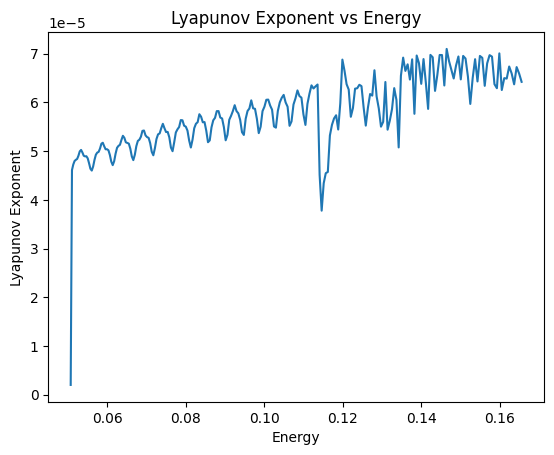

In [36]:
def calculate_lyapunov_exponent(array_of_results):
    # Calculate the separation at the last iteration
    final_separation = np.linalg.norm(array_of_results[1][-1] - array_of_results[0][-1])
    
    # Calculate the initial separation
    initial_separation = np.linalg.norm(array_of_results[1][0] - array_of_results[0][0])
    
    # Calculate the Lyapunov exponent
    lyap_exponent = np.log(final_separation / initial_separation) / len(array_of_results[0])
    
    return lyap_exponent

# Checking the Energy of the Initial Conditions

# Initial conditions
x_0, y_0, vx_0, vy_0 = 0.25, 0.15, 0, 0
perturbation = 0.001

number_of_plots = 240

print("Initial Values are:", x_0, y_0, vx_0, vy_0)
print("Energy is equal to:", energy(x_0, y_0, vx_0, vy_0))
print("Perturbed Energy is equal to:", energy(x_0 + perturbation*number_of_plots, y_0, vx_0, vy_0))  

print("============================================================")
print("Initializing Arrays...")
print("============================================================")

# Time parameters
t_0 = 0
t_end = 1000  # Choose an appropriate end time
dt = 0.01  # Time step size

# Number of steps
num_steps = int((t_end - t_0) / dt)
t_values = np.linspace(t_0, t_end, num_steps)




print("============================================================")
print("Arrays Initialized.")
print("Beginning simulation....")
print("============================================================")

lyapunov_exponents = []
energy_values = []
previous_result = np.zeros((num_steps, 4))
for index in range(number_of_plots):
    # Create a 2D array to store results (each column represents x, y, vx, vy)
    results = np.zeros((num_steps, 4))
    # Set initial values
    results[0] = [x_0 + perturbation * index, y_0, vx_0, vy_0]
    print("Simulating With energy = ", energy(x_0 + perturbation * index, y_0, vx_0, vy_0) )
    energy_values.append(energy(x_0 + perturbation * index, y_0, vx_0, vy_0))
    if energy(x_0 + perturbation * index, y_0, vx_0, vy_0) > (1/6):
        print("Energy is Greater than the Chaos Threshold. Halting Simulation")
        break
    # Run the simulation using RK4 method
    for i in tqdm(range(1, num_steps)):
        x, y, vx, vy = results[i-1]
        x_new, y_new, vx_new, vy_new = rk4_step(x, y, vx, vy, dt)
        results[i] = [x_new, y_new, vx_new, vy_new]
    print("Simulation Complete.")
    print("Plotting results...")
    print("================================================================")
    filename = "images/poincare_map_" + str(index) + ".png"
    #plot_poincare_map([results,])
    
    lyap = calculate_lyapunov_exponent([previous_result, results])
    print(lyap)
    lyapunov_exponents.append(lyap)
    previous_result = results

print("================================================================")

x_axis = [x_0 + i * perturbation for i in range(len(lyapunov_exponents))]

plt.plot(energy_values, lyapunov_exponents)
plt.ylabel("Lyapunov Exponent")
plt.xlabel("Energy")
plt.title("Lyapunov Exponent vs Energy")